In [1]:
API_KEY = "aac405e628f9c30a047d3de13192a7f7"

In [2]:
import pandas as pd
df = pd.read_csv('/Users/user/Desktop/india_monitoring_locations_filtered.csv')

In [3]:
df

,id,name,city,country,latitude,longitude,parameters
0,12,SPARTAN - IIT Kanpur,SPARTAN - IIT Kanpur,IN,26.519000,80.233000,NaN
1,13,"Delhi Technological University, Delhi - CPCB","Delhi Technological University, Delhi - CPCB",IN,28.744000,77.120000,NaN
2,15,IGI Airport,IGI Airport,IN,28.560000,77.094000,NaN
3,16,Civil Lines,Civil Lines,IN,28.678700,77.226200,NaN
4,17,"R K Puram, Delhi - DPCC","R K Puram, Delhi - DPCC",IN,28.563262,77.186937,NaN
...,...,...,...,...,...,...,...
657,3409526,"Panchawati_Pashan, Pune - IITM","Panchawati_Pashan, Pune - IITM",IN,18.536457,73.805454,NaN
658,3409527,"SIPCOT Industrial Park, Perundurai - TNPCB","SIPCOT Industrial Park, Perundurai - TNPCB",IN,11.258242,77.552761,NaN
659,3409528,"Savta Mali Nagar, Pimpri-Chinchwad - IITM","Savta Mali Nagar, Pimpri-Chinchwad - IITM",IN,18.614767,73.799516,NaN
660,3409529,"Mahishkapur Road_B-Zone, Durgapur - WBPCB","Mahishkapur Road_B-Zone, Durgapur - WBPCB",IN,23.567923,87.306843,NaN


In [4]:
df_guwahati = df[df['city'].str.contains('Guwahati', case=False, na=False)]
print(df_guwahati)


          id                             name  \
171     6941  Railway Colony, Guwahati - APCB   
293    10903  Railway Colony, Guwahati - APCB   
339    42240      Pan Bazaar, Guwahati - APCB   
452   361411            IITG, Guwahati - PCBA   
495  3409360            IITG, Guwahati - PCBA   
525  3409390    LGBI Airport, Guwahati - PCBA   

                                city country   latitude  longitude  parameters  
171  Railway Colony, Guwahati - APCB      IN  26.144500  91.736200         NaN  
293  Railway Colony, Guwahati - APCB      IN  26.181742  91.780630         NaN  
339      Pan Bazaar, Guwahati - APCB      IN  26.187500  91.744194         NaN  
452            IITG, Guwahati - PCBA      IN  26.202864  91.700464         NaN  
495            IITG, Guwahati - PCBA      IN  26.202864  91.700464         NaN  
525    LGBI Airport, Guwahati - PCBA      IN  26.108870  91.589544         NaN  


In [5]:
stations = df_guwahati.to_dict(orient='records')

# Now df_list is a list of dictionaries, 
# where each dictionary corresponds to a row of the DataFrame.
for item in stations:
    print(item)



{'id': 6941, 'name': 'Railway Colony, Guwahati - APCB', 'city': 'Railway Colony, Guwahati - APCB', 'country': 'IN', 'latitude': 26.1445, 'longitude': 91.7362, 'parameters': nan}
{'id': 10903, 'name': 'Railway Colony, Guwahati - APCB', 'city': 'Railway Colony, Guwahati - APCB', 'country': 'IN', 'latitude': 26.181742, 'longitude': 91.78063, 'parameters': nan}
{'id': 42240, 'name': 'Pan Bazaar, Guwahati - APCB', 'city': 'Pan Bazaar, Guwahati - APCB', 'country': 'IN', 'latitude': 26.1875, 'longitude': 91.744194, 'parameters': nan}
{'id': 361411, 'name': 'IITG, Guwahati - PCBA', 'city': 'IITG, Guwahati - PCBA', 'country': 'IN', 'latitude': 26.2028636, 'longitude': 91.70046436, 'parameters': nan}
{'id': 3409360, 'name': 'IITG, Guwahati - PCBA', 'city': 'IITG, Guwahati - PCBA', 'country': 'IN', 'latitude': 26.2028636, 'longitude': 91.70046436, 'parameters': nan}
{'id': 3409390, 'name': 'LGBI Airport, Guwahati - PCBA', 'city': 'LGBI Airport, Guwahati - PCBA', 'country': 'IN', 'latitude': 26.10

In [8]:
import requests
import datetime
import time
import pandas as pd

BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution/history"

end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)

def to_timestamp(dt):
    """Convert a datetime object to a Unix timestamp."""
    return int(dt.timestamp())

def fetch_daily_air_quality(station, day):
    """
    Fetch the historical air quality data for a specific station on a given day.
    Retrieves the AQI as well as hourly pollutant values for:
      - co, no, no2, o3, so2, pm2_5, pm10, nh3
    and computes daily averages.
    """
    day_start = datetime.datetime.combine(day, datetime.time.min)
    day_end = datetime.datetime.combine(day, datetime.time.max)
    
    params = {
        "lat": station["latitude"],
        "lon": station["longitude"],
        "start": to_timestamp(day_start),
        "end": to_timestamp(day_end),
        "appid": API_KEY
    }
    
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        
        # Lists to hold hourly data
        hourly_aqi = []
        # Define the pollutant components to extract
        components_keys = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
        hourly_components = {key: [] for key in components_keys}
        
        for entry in data.get("list", []):
            # Extract AQI value from "main"
            if "main" in entry and "aqi" in entry["main"]:
                hourly_aqi.append(entry["main"]["aqi"])
            
            # Extract pollutant components if available
            if "components" in entry:
                for key in components_keys:
                    if key in entry["components"]:
                        hourly_components[key].append(entry["components"][key])
        
        # Compute daily averages for AQI and each pollutant
        daily_avg_aqi = sum(hourly_aqi) / len(hourly_aqi) if hourly_aqi else None
        daily_avg_components = {}
        for key, values in hourly_components.items():
            daily_avg_components[key] = sum(values) / len(values) if values else None
        
        return daily_avg_aqi, daily_avg_components
    else:
        print(f"Error on {day} for {station['name']}: {response.status_code} - {response.text}")
        return None, {}

def collect_data(stations):
    """
    Iterates over stations and days, fetching the daily average AQI and pollutant values,
    and returns a list of dictionaries (one per day per station).
    """
    
    records = []
    
    for station in stations:
        print(f"\nFetching air quality data for {station['name']} (lat: {station['latitude']}, lon: {station['longitude']})")
        current_date = start_date
        while current_date <= end_date:
            avg_aqi, avg_components = fetch_daily_air_quality(station, current_date)
            
            # Build a record (dictionary) with the station name, date, and pollutant averages
            record = {
                "station": station["name"],
                "date": current_date,
                "avg_aqi": avg_aqi
            }
            # Add each pollutant component to the record
            for comp, value in avg_components.items():
                record[comp] = value
            
            records.append(record)
            
            print(f"  {current_date}: AQI={avg_aqi}, Pollutants={avg_components}")
            
            # Advance to the next day
            current_date += datetime.timedelta(days=1)
            # Pause briefly to respect API rate limits (adjust as necessary)
            time.sleep(1)
    
    return records

# Collect the data and convert it into a DataFrame
data_records = collect_data(stations)
df = pd.DataFrame(data_records)
print("\nDataFrame with daily average pollutant values:")
print(df)



Fetching air quality data for Railway Colony, Guwahati - APCB (lat: 26.1445, lon: 91.7362)
  2024-03-26: AQI=2.75, Pollutants={'co': 791.3504166666668, 'no': 0.16708333333333333, 'no2': 10.065833333333332, 'o3': 41.12166666666666, 'so2': 5.074583333333334, 'pm2_5': 31.688333333333333, 'pm10': 37.015, 'nh3': 5.262083333333334}
  2024-03-27: AQI=2.7083333333333335, Pollutants={'co': 712.91125, 'no': 0.19791666666666666, 'no2': 8.905833333333334, 'o3': 54.07749999999999, 'so2': 3.794166666666667, 'pm2_5': 27.02291666666667, 'pm10': 33.68791666666666, 'nh3': 6.773750000000001}
  2024-03-28: AQI=3.1666666666666665, Pollutants={'co': 786.34375, 'no': 0.36874999999999997, 'no2': 11.259999999999998, 'o3': 55.36041666666667, 'so2': 3.9429166666666657, 'pm2_5': 38.57000000000001, 'pm10': 50.44333333333335, 'nh3': 8.093333333333334}
  2024-03-29: AQI=3.4166666666666665, Pollutants={'co': 852.5445833333333, 'no': 0.67375, 'no2': 13.125000000000002, 'o3': 56.03458333333333, 'so2': 6.03583333333333

  2024-04-28: AQI=2.5, Pollutants={'co': 477.5916666666667, 'no': 0.05875000000000002, 'no2': 2.814583333333333, 'o3': 94.41291666666667, 'so2': 2.2937499999999997, 'pm2_5': 23.025000000000002, 'pm10': 25.509583333333325, 'nh3': 5.747499999999999}
  2024-04-29: AQI=2.4166666666666665, Pollutants={'co': 482.04125, 'no': 0.08583333333333332, 'no2': 3.5820833333333333, 'o3': 80.10875000000001, 'so2': 2.9000000000000004, 'pm2_5': 16.997083333333336, 'pm10': 21.102499999999996, 'nh3': 6.081666666666666}
  2024-04-30: AQI=2.25, Pollutants={'co': 475.9220833333333, 'no': 0.08083333333333333, 'no2': 3.5675000000000003, 'o3': 76.18999999999998, 'so2': 3.02875, 'pm2_5': 15.401250000000003, 'pm10': 19.506249999999998, 'nh3': 6.7679166666666655}
  2024-05-01: AQI=2.5416666666666665, Pollutants={'co': 529.0504166666666, 'no': 0.08458333333333333, 'no2': 7.661249999999999, 'o3': 74.37875000000001, 'so2': 4.12875, 'pm2_5': 23.459166666666665, 'pm10': 33.36541666666667, 'nh3': 7.739999999999999}
  202

  2024-05-31: AQI=1.5416666666666667, Pollutants={'co': 539.8987500000001, 'no': 0.09791666666666665, 'no2': 8.386666666666667, 'o3': 23.76625, 'so2': 5.271666666666666, 'pm2_5': 11.068333333333333, 'pm10': 13.581249999999999, 'nh3': 3.2783333333333338}
  2024-06-01: AQI=1.25, Pollutants={'co': 458.95458333333323, 'no': 0.07708333333333332, 'no2': 6.405, 'o3': 29.469583333333336, 'so2': 3.7500000000000004, 'pm2_5': 7.841249999999999, 'pm10': 10.003749999999997, 'nh3': 3.752083333333333}
  2024-06-02: AQI=1.25, Pollutants={'co': 418.6233333333334, 'no': 0.08333333333333333, 'no2': 5.982083333333333, 'o3': 38.52708333333333, 'so2': 3.72625, 'pm2_5': 7.451250000000001, 'pm10': 9.34875, 'nh3': 3.395833333333334}
  2024-06-03: AQI=1.75, Pollutants={'co': 521.6795833333332, 'no': 0.1391666666666667, 'no2': 10.679166666666665, 'o3': 36.13541666666667, 'so2': 8.121249999999998, 'pm2_5': 12.513333333333335, 'pm10': 15.318333333333333, 'nh3': 4.835416666666667}
  2024-06-04: AQI=1.45833333333333

  2024-07-04: AQI=2.3333333333333335, Pollutants={'co': 719.5870833333333, 'no': 0.2383333333333333, 'no2': 14.502499999999998, 'o3': 21.732499999999998, 'so2': 6.674583333333334, 'pm2_5': 22.79416666666666, 'pm10': 26.899166666666662, 'nh3': 4.945}
  2024-07-05: AQI=2.5416666666666665, Pollutants={'co': 763.3970833333333, 'no': 0.7949999999999999, 'no2': 16.356666666666666, 'o3': 25.419583333333332, 'so2': 7.097083333333333, 'pm2_5': 26.506249999999998, 'pm10': 31.875416666666666, 'nh3': 5.47625}
  2024-07-06: AQI=2.1666666666666665, Pollutants={'co': 618.8941666666666, 'no': 0.16124999999999998, 'no2': 10.900833333333336, 'o3': 31.534166666666664, 'so2': 5.22625, 'pm2_5': 18.331666666666667, 'pm10': 22.071666666666673, 'nh3': 4.12125}
  2024-07-07: AQI=1.6666666666666667, Pollutants={'co': 499.56625, 'no': 0.07916666666666668, 'no2': 8.53125, 'o3': 24.0775, 'so2': 5.54, 'pm2_5': 12.164583333333333, 'pm10': 15.198749999999997, 'nh3': 4.079583333333333}
  2024-07-08: AQI=1.625, Polluta

  2024-08-07: AQI=3.4166666666666665, Pollutants={'co': 1000.8016666666667, 'no': 1.2000000000000002, 'no2': 26.187083333333334, 'o3': 19.443749999999998, 'so2': 12.711250000000001, 'pm2_5': 48.60916666666666, 'pm10': 59.285000000000004, 'nh3': 12.712916666666667}
  2024-08-08: AQI=2.2083333333333335, Pollutants={'co': 600.67625, 'no': 0.11624999999999998, 'no2': 12.28875, 'o3': 27.242916666666662, 'so2': 7.602499999999999, 'pm2_5': 19.39041666666667, 'pm10': 22.723750000000006, 'nh3': 4.127916666666668}
  2024-08-09: AQI=2.2916666666666665, Pollutants={'co': 670.77125, 'no': 0.585, 'no2': 13.504583333333334, 'o3': 24.980833333333333, 'so2': 8.190833333333334, 'pm2_5': 22.1125, 'pm10': 26.871666666666666, 'nh3': 5.261666666666667}
  2024-08-10: AQI=2.125, Pollutants={'co': 642.6770833333334, 'no': 0.47, 'no2': 12.423333333333334, 'o3': 31.112916666666663, 'so2': 6.958749999999998, 'pm2_5': 21.91541666666667, 'pm10': 28.02583333333334, 'nh3': 6.272083333333332}
  2024-08-11: AQI=2.79166

  2024-09-10: AQI=2.611111111111111, Pollutants={'co': 748.4216666666666, 'no': 2.2783333333333338, 'no2': 14.64611111111111, 'o3': 41.54555555555555, 'so2': 8.002777777777776, 'pm2_5': 28.571666666666673, 'pm10': 36.73555555555556, 'nh3': 6.581666666666667}
  2024-09-11: AQI=2.9583333333333335, Pollutants={'co': 877.3000000000001, 'no': 1.87875, 'no2': 17.796666666666667, 'o3': 30.362916666666667, 'so2': 10.509166666666667, 'pm2_5': 33.77583333333333, 'pm10': 42.32166666666666, 'nh3': 11.509583333333332}
  2024-09-12: AQI=2.875, Pollutants={'co': 809.4312499999997, 'no': 0.5533333333333333, 'no2': 14.377083333333331, 'o3': 38.07708333333334, 'so2': 4.972916666666666, 'pm2_5': 32.72208333333334, 'pm10': 42.84833333333333, 'nh3': 7.663749999999998}
  2024-09-13: AQI=1.9166666666666667, Pollutants={'co': 539.4829166666667, 'no': 0.11124999999999997, 'no2': 5.250416666666667, 'o3': 43.75625, 'so2': 2.422083333333333, 'pm2_5': 15.640833333333333, 'pm10': 18.759583333333335, 'nh3': 4.100833

  2024-10-14: AQI=3.2083333333333335, Pollutants={'co': 829.1795833333331, 'no': 1.5245833333333334, 'no2': 11.72125, 'o3': 37.86458333333333, 'so2': 5.130416666666666, 'pm2_5': 42.4275, 'pm10': 52.23999999999999, 'nh3': 8.398333333333335}
  2024-10-15: AQI=3.625, Pollutants={'co': 835.0220833333333, 'no': 2.0216666666666665, 'no2': 15.080833333333333, 'o3': 37.32958333333334, 'so2': 6.638749999999999, 'pm2_5': 50.19375, 'pm10': 62.396666666666675, 'nh3': 15.461666666666664}
  2024-10-16: AQI=3.7083333333333335, Pollutants={'co': 991.9008333333331, 'no': 0.8633333333333333, 'no2': 20.242916666666666, 'o3': 34.16249999999999, 'so2': 8.07625, 'pm2_5': 56.04791666666666, 'pm10': 67.68875000000001, 'nh3': 13.467916666666667}
  2024-10-17: AQI=3.3333333333333335, Pollutants={'co': 904.28125, 'no': 1.4383333333333335, 'no2': 14.835833333333333, 'o3': 28.550416666666667, 'so2': 4.410416666666666, 'pm2_5': 46.645, 'pm10': 57.409166666666664, 'nh3': 7.232916666666667}
  2024-10-18: AQI=3.208333

  2024-11-17: AQI=4.541666666666667, Pollutants={'co': 1025.2808333333332, 'no': 0.8579166666666665, 'no2': 26.177916666666672, 'o3': 50.32500000000002, 'so2': 10.676249999999998, 'pm2_5': 81.6095833333333, 'pm10': 95.84083333333332, 'nh3': 32.20916666666667}
  2024-11-18: AQI=4.0, Pollutants={'co': 795.9408333333332, 'no': 1.5083333333333335, 'no2': 18.99708333333333, 'o3': 41.98291666666666, 'so2': 6.295000000000001, 'pm2_5': 62.12833333333334, 'pm10': 78.0170833333333, 'nh3': 15.43416666666667}
  2024-11-19: AQI=3.5416666666666665, Pollutants={'co': 813.1858333333331, 'no': 3.170833333333333, 'no2': 21.80583333333333, 'o3': 37.201249999999995, 'so2': 7.388333333333333, 'pm2_5': 50.02291666666667, 'pm10': 66.22458333333334, 'nh3': 15.969166666666666}
  2024-11-20: AQI=3.375, Pollutants={'co': 817.2195833333332, 'no': 3.587916666666667, 'no2': 22.61666666666667, 'o3': 36.82791666666666, 'so2': 8.949583333333333, 'pm2_5': 46.387083333333344, 'pm10': 62.993749999999984, 'nh3': 21.788750

  2024-12-21: AQI=4.041666666666667, Pollutants={'co': 893.8512499999997, 'no': 1.2325000000000002, 'no2': 24.28958333333333, 'o3': 40.117916666666666, 'so2': 6.937083333333334, 'pm2_5': 62.20416666666666, 'pm10': 76.50875, 'nh3': 16.8775}
  2024-12-22: AQI=3.5833333333333335, Pollutants={'co': 714.1620833333335, 'no': 0.7708333333333336, 'no2': 15.820000000000002, 'o3': 43.615416666666675, 'so2': 4.193333333333334, 'pm2_5': 50.21125000000001, 'pm10': 59.96666666666666, 'nh3': 8.433749999999998}
  2024-12-23: AQI=3.75, Pollutants={'co': 751.5741666666664, 'no': 1.6341666666666665, 'no2': 17.791666666666668, 'o3': 36.901250000000005, 'so2': 3.834166666666666, 'pm2_5': 50.59791666666666, 'pm10': 62.85666666666665, 'nh3': 7.76625}
  2024-12-24: AQI=3.6666666666666665, Pollutants={'co': 867.2879166666667, 'no': 2.0654166666666667, 'no2': 23.366249999999997, 'o3': 33.017500000000005, 'so2': 6.675833333333334, 'pm2_5': 53.24291666666667, 'pm10': 68.95583333333333, 'nh3': 16.334166666666665}


  2025-01-24: AQI=5.0, Pollutants={'co': 1097.0445833333333, 'no': 0.6475000000000001, 'no2': 19.265, 'o3': 76.57083333333333, 'so2': 8.082916666666668, 'pm2_5': 173.0275, 'pm10': 185.7770833333333, 'nh3': 8.724583333333333}
  2025-01-25: AQI=5.0, Pollutants={'co': 1219.9874999999997, 'no': 0.17541666666666667, 'no2': 20.265416666666663, 'o3': 73.94000000000001, 'so2': 8.136666666666668, 'pm2_5': 188.5625, 'pm10': 202.47375, 'nh3': 11.882499999999999}
  2025-01-26: AQI=5.0, Pollutants={'co': 1096.20875, 'no': 0.42124999999999996, 'no2': 21.09958333333333, 'o3': 68.05333333333336, 'so2': 6.351250000000001, 'pm2_5': 147.20749999999998, 'pm10': 161.49625, 'nh3': 15.8675}
  2025-01-27: AQI=5.0, Pollutants={'co': 1139.8791666666668, 'no': 0.866666666666667, 'no2': 23.92125, 'o3': 56.10208333333333, 'so2': 9.259166666666667, 'pm2_5': 129.89208333333337, 'pm10': 143.8325, 'nh3': 12.033749999999998}
  2025-01-28: AQI=5.0, Pollutants={'co': 1117.9049999999997, 'no': 0.36458333333333326, 'no2': 

  2025-02-28: AQI=4.75, Pollutants={'co': 1311.2216666666668, 'no': 1.64625, 'no2': 36.35791666666667, 'o3': 66.60791666666667, 'so2': 13.852916666666667, 'pm2_5': 93.9508333333333, 'pm10': 112.6708333333333, 'nh3': 26.00208333333333}
  2025-03-01: AQI=4.166666666666667, Pollutants={'co': 875.3537500000001, 'no': 0.43166666666666664, 'no2': 12.590416666666668, 'o3': 77.54583333333335, 'so2': 6.137083333333333, 'pm2_5': 69.36375, 'pm10': 79.30000000000001, 'nh3': 12.014583333333333}
  2025-03-02: AQI=3.5416666666666665, Pollutants={'co': 784.9537499999998, 'no': 0.4725, 'no2': 15.535833333333336, 'o3': 71.59208333333335, 'so2': 5.442916666666666, 'pm2_5': 48.68, 'pm10': 57.86041666666667, 'nh3': 11.385416666666666}
  2025-03-03: AQI=3.75, Pollutants={'co': 857.5529166666666, 'no': 0.2520833333333333, 'no2': 16.456666666666667, 'o3': 74.08833333333332, 'so2': 6.268750000000001, 'pm2_5': 59.03916666666667, 'pm10': 72.45625000000001, 'nh3': 14.797916666666664}
  2025-03-04: AQI=4.25, Pollu

  2024-04-02: AQI=3.3333333333333335, Pollutants={'co': 733.2158333333333, 'no': 0.1975, 'no2': 10.871666666666668, 'o3': 52.071666666666665, 'so2': 4.484166666666666, 'pm2_5': 44.00666666666667, 'pm10': 54.30416666666665, 'nh3': 8.1225}
  2024-04-03: AQI=3.0833333333333335, Pollutants={'co': 583.8466666666667, 'no': 0.13333333333333333, 'no2': 6.192499999999999, 'o3': 76.20416666666667, 'so2': 3.570833333333333, 'pm2_5': 35.84416666666667, 'pm10': 42.81625, 'nh3': 7.287916666666668}
  2024-04-04: AQI=3.0, Pollutants={'co': 574.3891666666667, 'no': 0.12458333333333334, 'no2': 5.9125000000000005, 'o3': 72.52333333333335, 'so2': 3.42625, 'pm2_5': 33.270833333333336, 'pm10': 38.591666666666676, 'nh3': 6.7320833333333345}
  2024-04-05: AQI=2.875, Pollutants={'co': 553.2495833333332, 'no': 0.09499999999999999, 'no2': 5.317083333333334, 'o3': 81.33083333333333, 'so2': 3.5316666666666667, 'pm2_5': 31.62708333333333, 'pm10': 36.85625, 'nh3': 6.458333333333333}
  2024-04-06: AQI=2.8333333333333

  2024-05-06: AQI=1.5833333333333333, Pollutants={'co': 435.7291666666667, 'no': 0.04958333333333334, 'no2': 4.155833333333333, 'o3': 51.06749999999999, 'so2': 3.5674999999999994, 'pm2_5': 8.773750000000001, 'pm10': 10.4175, 'nh3': 3.0887499999999997}
  2024-05-07: AQI=2.0833333333333335, Pollutants={'co': 515.9770833333333, 'no': 0.1445833333333333, 'no2': 7.244583333333334, 'o3': 41.89541666666667, 'so2': 3.7591666666666668, 'pm2_5': 13.250416666666665, 'pm10': 16.852083333333333, 'nh3': 4.694166666666667}
  2024-05-08: AQI=2.5416666666666665, Pollutants={'co': 721.9516666666667, 'no': 1.2583333333333333, 'no2': 12.699583333333331, 'o3': 36.43541666666666, 'so2': 6.740416666666666, 'pm2_5': 26.6525, 'pm10': 35.19375, 'nh3': 9.663749999999999}
  2024-05-09: AQI=2.3333333333333335, Pollutants={'co': 599.7024999999999, 'no': 0.8587500000000001, 'no2': 9.196250000000001, 'o3': 35.43208333333333, 'so2': 4.097499999999999, 'pm2_5': 20.19125, 'pm10': 27.063333333333333, 'nh3': 5.16333333333

  2024-06-09: AQI=2.125, Pollutants={'co': 578.8387499999999, 'no': 0.057916666666666665, 'no2': 7.927083333333333, 'o3': 42.779583333333335, 'so2': 5.311666666666667, 'pm2_5': 14.805000000000001, 'pm10': 18.934583333333336, 'nh3': 4.310833333333334}
  2024-06-10: AQI=1.6666666666666667, Pollutants={'co': 610.5504166666666, 'no': 0.1175, 'no2': 10.233333333333333, 'o3': 33.46125, 'so2': 5.5079166666666675, 'pm2_5': 13.321666666666665, 'pm10': 18.194583333333334, 'nh3': 4.624583333333333}
  2024-06-11: AQI=1.8333333333333333, Pollutants={'co': 688.1549999999999, 'no': 0.4795833333333333, 'no2': 13.307916666666666, 'o3': 26.734583333333333, 'so2': 6.091666666666668, 'pm2_5': 18.340833333333332, 'pm10': 24.467916666666664, 'nh3': 5.698333333333333}
  2024-06-12: AQI=2.5, Pollutants={'co': 855.6041666666666, 'no': 0.8158333333333333, 'no2': 16.242083333333333, 'o3': 27.182500000000005, 'so2': 7.353750000000001, 'pm2_5': 27.898749999999996, 'pm10': 36.47458333333333, 'nh3': 7.26291666666666

  2024-07-13: AQI=2.2083333333333335, Pollutants={'co': 540.59375, 'no': 0.1691666666666667, 'no2': 8.262916666666667, 'o3': 46.872083333333315, 'so2': 4.785833333333333, 'pm2_5': 16.186666666666667, 'pm10': 19.509583333333335, 'nh3': 4.399166666666667}
  2024-07-14: AQI=2.2083333333333335, Pollutants={'co': 595.9470833333334, 'no': 0.09666666666666668, 'no2': 9.847916666666668, 'o3': 37.40958333333334, 'so2': 4.132083333333334, 'pm2_5': 19.38208333333333, 'pm10': 23.253333333333334, 'nh3': 4.9925}
  2024-07-15: AQI=2.0, Pollutants={'co': 644.7637499999998, 'no': 1.28125, 'no2': 13.143749999999999, 'o3': 27.655833333333323, 'so2': 5.280833333333333, 'pm2_5': 17.658749999999998, 'pm10': 23.433333333333337, 'nh3': 5.779583333333332}
  2024-07-16: AQI=2.2083333333333335, Pollutants={'co': 622.5104166666666, 'no': 0.2504166666666667, 'no2': 12.424166666666665, 'o3': 32.295833333333334, 'so2': 6.535, 'pm2_5': 19.754166666666666, 'pm10': 25.199166666666667, 'nh3': 5.121666666666667}
  2024-0

  2024-08-16: AQI=2.9583333333333335, Pollutants={'co': 882.8641666666668, 'no': 0.81875, 'no2': 14.281666666666666, 'o3': 39.20291666666667, 'so2': 6.4629166666666675, 'pm2_5': 39.17875, 'pm10': 46.444583333333334, 'nh3': 6.075}
  2024-08-17: AQI=2.375, Pollutants={'co': 668.9625, 'no': 0.25291666666666657, 'no2': 8.066666666666668, 'o3': 35.32791666666667, 'so2': 4.447083333333333, 'pm2_5': 25.21291666666667, 'pm10': 29.353333333333328, 'nh3': 4.7129166666666675}
  2024-08-18: AQI=1.625, Pollutants={'co': 505.12875, 'no': 0.33666666666666667, 'no2': 7.147916666666666, 'o3': 12.603750000000003, 'so2': 2.5608333333333335, 'pm2_5': 11.584166666666667, 'pm10': 16.120416666666664, 'nh3': 5.1000000000000005}
  2024-08-19: AQI=1.4166666666666667, Pollutants={'co': 459.92875, 'no': 0.17958333333333332, 'no2': 5.907916666666666, 'o3': 19.513333333333335, 'so2': 2.840833333333333, 'pm2_5': 10.960416666666667, 'pm10': 13.922083333333333, 'nh3': 3.9387499999999993}
  2024-08-20: AQI=1.0, Polluta

  2024-09-19: AQI=2.4583333333333335, Pollutants={'co': 621.11875, 'no': 0.6895833333333333, 'no2': 10.573750000000002, 'o3': 43.94791666666668, 'so2': 6.412499999999999, 'pm2_5': 23.906249999999996, 'pm10': 30.96166666666667, 'nh3': 7.554583333333334}
  2024-09-20: AQI=2.7083333333333335, Pollutants={'co': 644.4854166666665, 'no': 0.6233333333333332, 'no2': 11.730416666666668, 'o3': 46.56333333333333, 'so2': 6.584166666666666, 'pm2_5': 25.73125, 'pm10': 33.422083333333326, 'nh3': 7.9262500000000005}
  2024-09-21: AQI=3.3333333333333335, Pollutants={'co': 772.1579166666667, 'no': 0.8100000000000002, 'no2': 14.35708333333333, 'o3': 54.038333333333334, 'so2': 6.349166666666669, 'pm2_5': 46.12666666666667, 'pm10': 56.195, 'nh3': 9.80375}
  2024-09-22: AQI=3.8333333333333335, Pollutants={'co': 724.3154166666665, 'no': 0.4591666666666667, 'no2': 14.459583333333335, 'o3': 51.718333333333334, 'so2': 6.125000000000001, 'pm2_5': 55.78583333333333, 'pm10': 67.61875, 'nh3': 15.097500000000002}
  

  2024-10-23: AQI=2.5416666666666665, Pollutants={'co': 621.3970833333333, 'no': 0.19666666666666666, 'no2': 8.690416666666666, 'o3': 35.69458333333334, 'so2': 3.4008333333333334, 'pm2_5': 28.56583333333333, 'pm10': 36.19666666666667, 'nh3': 6.071666666666666}
  2024-10-24: AQI=2.25, Pollutants={'co': 538.2287499999999, 'no': 0.13374999999999995, 'no2': 6.961250000000001, 'o3': 31.12875, 'so2': 2.7754166666666666, 'pm2_5': 20.760833333333334, 'pm10': 23.474999999999998, 'nh3': 3.057916666666667}
  2024-10-25: AQI=1.7083333333333333, Pollutants={'co': 494.55875, 'no': 0.08749999999999995, 'no2': 7.131249999999999, 'o3': 23.977500000000003, 'so2': 2.3920833333333333, 'pm2_5': 15.274166666666666, 'pm10': 17.680416666666662, 'nh3': 2.8187499999999996}
  2024-10-26: AQI=2.375, Pollutants={'co': 603.0404166666666, 'no': 0.6537499999999999, 'no2': 10.497083333333334, 'o3': 32.50249999999999, 'so2': 3.3787500000000006, 'pm2_5': 23.134583333333335, 'pm10': 30.719166666666663, 'nh3': 6.701249999

  2024-11-26: AQI=3.0416666666666665, Pollutants={'co': 809.0145833333331, 'no': 2.685416666666667, 'no2': 18.85, 'o3': 28.90708333333333, 'so2': 4.322916666666666, 'pm2_5': 40.12166666666666, 'pm10': 53.89958333333334, 'nh3': 8.545833333333333}
  2024-11-27: AQI=2.75, Pollutants={'co': 701.36875, 'no': 1.9087499999999997, 'no2': 16.109166666666663, 'o3': 37.47083333333334, 'so2': 4.091666666666668, 'pm2_5': 33.827083333333334, 'pm10': 46.317083333333336, 'nh3': 8.229166666666666}
  2024-11-28: AQI=2.7083333333333335, Pollutants={'co': 629.1866666666668, 'no': 1.2629166666666667, 'no2': 13.86458333333333, 'o3': 41.07541666666666, 'so2': 3.5075, 'pm2_5': 31.336250000000007, 'pm10': 42.187083333333334, 'nh3': 7.533333333333332}
  2024-11-29: AQI=3.25, Pollutants={'co': 727.9304166666667, 'no': 2.1687499999999993, 'no2': 17.903333333333332, 'o3': 40.107499999999995, 'so2': 4.305833333333333, 'pm2_5': 40.944583333333334, 'pm10': 55.23166666666666, 'nh3': 10.058749999999998}
  2024-11-30: A

  2024-12-30: AQI=4.416666666666667, Pollutants={'co': 884.8104166666664, 'no': 1.2508333333333332, 'no2': 22.36666666666667, 'o3': 50.806666666666665, 'so2': 8.182916666666669, 'pm2_5': 73.13041666666666, 'pm10': 87.44083333333333, 'nh3': 16.01}
  2024-12-31: AQI=4.708333333333333, Pollutants={'co': 1073.4004166666668, 'no': 1.285, 'no2': 29.657916666666665, 'o3': 43.56875, 'so2': 9.660833333333333, 'pm2_5': 92.89791666666666, 'pm10': 108.27666666666664, 'nh3': 14.989166666666668}
  2025-01-01: AQI=4.666666666666667, Pollutants={'co': 1151.56125, 'no': 0.9687499999999999, 'no2': 32.70250000000001, 'o3': 48.33958333333331, 'so2': 11.039166666666667, 'pm2_5': 105.50999999999999, 'pm10': 121.22625, 'nh3': 19.092499999999998}
  2025-01-02: AQI=4.875, Pollutants={'co': 1110.95125, 'no': 0.8966666666666662, 'no2': 30.27666666666666, 'o3': 46.287083333333335, 'so2': 10.747916666666667, 'pm2_5': 103.62416666666667, 'pm10': 119.65708333333332, 'nh3': 21.95875}
  2025-01-03: AQI=4.875, Pollutan

  2025-02-02: AQI=3.9166666666666665, Pollutants={'co': 946.2841666666668, 'no': 0.7425, 'no2': 21.255000000000003, 'o3': 47.93375, 'so2': 4.497083333333333, 'pm2_5': 65.235, 'pm10': 78.29041666666664, 'nh3': 9.221666666666666}
  2025-02-03: AQI=4.291666666666667, Pollutants={'co': 1232.2274999999997, 'no': 2.8433333333333337, 'no2': 34.86833333333334, 'o3': 37.167500000000004, 'so2': 9.494583333333331, 'pm2_5': 77.885, 'pm10': 96.1175, 'nh3': 16.51666666666667}
  2025-02-04: AQI=4.666666666666667, Pollutants={'co': 1255.0354166666666, 'no': 1.4425000000000001, 'no2': 36.05875, 'o3': 52.597916666666656, 'so2': 9.243333333333336, 'pm2_5': 91.60125000000001, 'pm10': 111.29583333333335, 'nh3': 20.31875}
  2025-02-05: AQI=4.875, Pollutants={'co': 1224.1608333333331, 'no': 0.58875, 'no2': 28.766666666666666, 'o3': 55.46791666666667, 'so2': 9.444166666666666, 'pm2_5': 102.31208333333335, 'pm10': 119.50791666666663, 'nh3': 11.339166666666669}
  2025-02-06: AQI=5.0, Pollutants={'co': 1143.2183

  2025-03-09: AQI=4.166666666666667, Pollutants={'co': 738.2233333333335, 'no': 0.09500000000000001, 'no2': 12.129999999999997, 'o3': 81.82208333333334, 'so2': 4.617499999999999, 'pm2_5': 64.5775, 'pm10': 75.57666666666664, 'nh3': 11.272916666666667}
  2025-03-10: AQI=4.583333333333333, Pollutants={'co': 1084.5266666666664, 'no': 0.5991666666666667, 'no2': 23.626666666666665, 'o3': 84.95916666666668, 'so2': 7.570000000000001, 'pm2_5': 86.76666666666667, 'pm10': 104.43874999999997, 'nh3': 15.911666666666664}
  2025-03-11: AQI=5.0, Pollutants={'co': 987.4508333333333, 'no': 0.26916666666666667, 'no2': 20.21708333333333, 'o3': 75.35583333333334, 'so2': 13.432916666666666, 'pm2_5': 92.23875, 'pm10': 106.42124999999999, 'nh3': 13.049999999999999}
  2025-03-12: AQI=4.458333333333333, Pollutants={'co': 781.6154166666665, 'no': 0.059166666666666666, 'no2': 12.06, 'o3': 84.71458333333335, 'so2': 7.327499999999998, 'pm2_5': 75.25166666666668, 'pm10': 82.56333333333333, 'nh3': 5.728333333333334}


  2024-04-10: AQI=3.2916666666666665, Pollutants={'co': 685.9295833333332, 'no': 0.15375, 'no2': 12.623333333333335, 'o3': 62.84916666666666, 'so2': 4.31375, 'pm2_5': 42.496249999999996, 'pm10': 54.43708333333333, 'nh3': 10.257916666666668}
  2024-04-11: AQI=3.3333333333333335, Pollutants={'co': 655.0554166666667, 'no': 0.17416666666666666, 'no2': 10.749583333333334, 'o3': 77.16541666666667, 'so2': 4.588333333333334, 'pm2_5': 37.36625, 'pm10': 48.29333333333333, 'nh3': 12.297083333333333}
  2024-04-12: AQI=3.8333333333333335, Pollutants={'co': 825.0079166666668, 'no': 0.25000000000000006, 'no2': 17.89166666666667, 'o3': 64.03416666666668, 'so2': 6.9145833333333355, 'pm2_5': 51.30416666666665, 'pm10': 66.63083333333334, 'nh3': 14.373750000000003}
  2024-04-13: AQI=4.25, Pollutants={'co': 825.2858333333332, 'no': 0.1525, 'no2': 15.111666666666666, 'o3': 62.32416666666666, 'so2': 5.9629166666666675, 'pm2_5': 67.02749999999999, 'pm10': 81.62875, 'nh3': 15.070833333333335}
  2024-04-14: AQI

  2024-05-14: AQI=3.0, Pollutants={'co': 705.5404166666666, 'no': 0.8287500000000003, 'no2': 13.344166666666665, 'o3': 53.240416666666654, 'so2': 6.93375, 'pm2_5': 27.761666666666667, 'pm10': 38.62333333333333, 'nh3': 9.869583333333331}
  2024-05-15: AQI=2.7916666666666665, Pollutants={'co': 688.4333333333334, 'no': 0.5279166666666667, 'no2': 11.78291666666667, 'o3': 60.22958333333333, 'so2': 7.089583333333333, 'pm2_5': 28.360833333333343, 'pm10': 36.87541666666666, 'nh3': 9.119166666666667}
  2024-05-16: AQI=3.5833333333333335, Pollutants={'co': 828.9016666666666, 'no': 0.28250000000000003, 'no2': 13.722499999999998, 'o3': 68.13916666666667, 'so2': 6.6954166666666675, 'pm2_5': 44.73458333333334, 'pm10': 55.302083333333336, 'nh3': 9.495000000000001}
  2024-05-17: AQI=4.291666666666667, Pollutants={'co': 828.06625, 'no': 0.13083333333333336, 'no2': 12.253749999999998, 'o3': 85.74916666666667, 'so2': 7.3233333333333315, 'pm2_5': 66.06875000000001, 'pm10': 77.21958333333335, 'nh3': 8.5287

  2024-06-17: AQI=2.111111111111111, Pollutants={'co': 713.5588888888888, 'no': 0.1277777777777778, 'no2': 19.315555555555555, 'o3': 18.83444444444445, 'so2': 10.67611111111111, 'pm2_5': 20.748333333333335, 'pm10': 26.546666666666667, 'nh3': 7.117222222222221}
  2024-06-18: AQI=1.9166666666666667, Pollutants={'co': 552.1374999999999, 'no': 0.0945833333333333, 'no2': 7.4795833333333315, 'o3': 30.000416666666666, 'so2': 4.671250000000001, 'pm2_5': 13.415833333333333, 'pm10': 15.902083333333335, 'nh3': 3.6062499999999997}
  2024-06-19: AQI=2.0833333333333335, Pollutants={'co': 546.0183333333333, 'no': 0.19625, 'no2': 9.380416666666667, 'o3': 19.709166666666665, 'so2': 5.2575, 'pm2_5': 13.850000000000001, 'pm10': 17.150416666666665, 'nh3': 4.085416666666667}
  2024-06-20: AQI=2.3333333333333335, Pollutants={'co': 666.4591666666668, 'no': 0.9191666666666666, 'no2': 10.662916666666666, 'o3': 24.986249999999995, 'so2': 5.102083333333333, 'pm2_5': 21.642916666666668, 'pm10': 25.599166666666665

  2024-07-20: AQI=1.6666666666666667, Pollutants={'co': 529.7458333333333, 'no': 0.09874999999999999, 'no2': 9.533333333333333, 'o3': 29.57833333333333, 'so2': 5.508749999999999, 'pm2_5': 12.920416666666668, 'pm10': 16.06791666666667, 'nh3': 4.619583333333333}
  2024-07-21: AQI=1.7083333333333333, Pollutants={'co': 502.3479166666666, 'no': 0.08666666666666667, 'no2': 10.02125, 'o3': 25.548750000000002, 'so2': 4.9383333333333335, 'pm2_5': 12.876249999999999, 'pm10': 15.855833333333331, 'nh3': 4.440416666666667}
  2024-07-22: AQI=2.2916666666666665, Pollutants={'co': 733.4941666666667, 'no': 0.2741666666666667, 'no2': 19.685, 'o3': 25.116250000000004, 'so2': 8.588333333333335, 'pm2_5': 23.267083333333332, 'pm10': 28.502083333333335, 'nh3': 9.157916666666667}
  2024-07-23: AQI=3.0, Pollutants={'co': 1003.5833333333334, 'no': 0.04, 'no2': 19.99166666666667, 'o3': 7.168333333333334, 'so2': 8.98, 'pm2_5': 42.44166666666667, 'pm10': 46.09833333333333, 'nh3': 5.395}
  2024-07-24: AQI=3.2222222

  2024-08-23: AQI=2.3333333333333335, Pollutants={'co': 649.9095833333332, 'no': 1.5058333333333336, 'no2': 12.300416666666665, 'o3': 30.63083333333333, 'so2': 7.533749999999999, 'pm2_5': 23.301250000000007, 'pm10': 29.077499999999997, 'nh3': 5.915833333333333}
  2024-08-24: AQI=1.7916666666666667, Pollutants={'co': 521.6795833333334, 'no': 0.08999999999999998, 'no2': 9.080833333333334, 'o3': 31.41666666666667, 'so2': 4.327083333333333, 'pm2_5': 13.521666666666663, 'pm10': 16.560416666666665, 'nh3': 4.1275}
  2024-08-25: AQI=1.8333333333333333, Pollutants={'co': 460.3458333333333, 'no': 0.09499999999999999, 'no2': 6.190416666666667, 'o3': 44.464166666666664, 'so2': 3.4237499999999996, 'pm2_5': 11.667083333333332, 'pm10': 14.28375, 'nh3': 4.535}
  2024-08-26: AQI=1.9166666666666667, Pollutants={'co': 554.7795833333332, 'no': 0.15708333333333332, 'no2': 11.296249999999999, 'o3': 27.142916666666675, 'so2': 5.222500000000001, 'pm2_5': 15.957916666666668, 'pm10': 21.0975, 'nh3': 6.356666666

  2024-09-25: AQI=2.0416666666666665, Pollutants={'co': 586.0720833333334, 'no': 0.06708333333333334, 'no2': 9.769166666666665, 'o3': 23.79625, 'so2': 4.500000000000001, 'pm2_5': 16.416249999999998, 'pm10': 20.15375, 'nh3': 4.0945833333333335}
  2024-09-26: AQI=2.5, Pollutants={'co': 795.2445833333333, 'no': 1.7837499999999997, 'no2': 15.5325, 'o3': 20.760833333333334, 'so2': 8.172500000000001, 'pm2_5': 27.88458333333334, 'pm10': 33.90125, 'nh3': 5.336666666666667}
  2024-09-27: AQI=2.0416666666666665, Pollutants={'co': 594.5554166666666, 'no': 0.3433333333333333, 'no2': 11.23041666666667, 'o3': 22.00375, 'so2': 6.2508333333333335, 'pm2_5': 18.662916666666664, 'pm10': 23.195416666666663, 'nh3': 4.97375}
  2024-09-28: AQI=1.875, Pollutants={'co': 481.90291666666684, 'no': 0.15666666666666665, 'no2': 7.677916666666666, 'o3': 37.03625, 'so2': 4.72, 'pm2_5': 13.441249999999998, 'pm10': 16.224999999999998, 'nh3': 4.065416666666666}
  2024-09-29: AQI=2.0416666666666665, Pollutants={'co': 492

  2024-10-29: AQI=3.875, Pollutants={'co': 878.4137499999998, 'no': 2.249166666666667, 'no2': 17.338333333333335, 'o3': 39.44541666666667, 'so2': 7.320833333333333, 'pm2_5': 61.65291666666667, 'pm10': 76.2775, 'nh3': 12.389583333333333}
  2024-10-30: AQI=4.208333333333333, Pollutants={'co': 1064.2208333333335, 'no': 1.4000000000000001, 'no2': 20.58833333333333, 'o3': 39.321250000000006, 'so2': 8.611249999999998, 'pm2_5': 72.19666666666667, 'pm10': 83.02250000000001, 'nh3': 8.711249999999998}
  2024-10-31: AQI=3.8333333333333335, Pollutants={'co': 1022.77625, 'no': 1.5291666666666668, 'no2': 18.942500000000003, 'o3': 31.148749999999996, 'so2': 7.940416666666667, 'pm2_5': 57.90333333333333, 'pm10': 68.01166666666666, 'nh3': 8.04875}
  2024-11-01: AQI=3.9583333333333335, Pollutants={'co': 1113.4541666666667, 'no': 1.6574999999999998, 'no2': 18.659583333333334, 'o3': 29.130000000000006, 'so2': 5.952500000000001, 'pm2_5': 59.05625, 'pm10': 69.14208333333333, 'nh3': 7.840416666666667}
  2024

  2024-12-02: AQI=3.3333333333333335, Pollutants={'co': 725.1508333333333, 'no': 1.6841666666666668, 'no2': 18.675416666666663, 'o3': 35.33541666666666, 'so2': 4.409166666666667, 'pm2_5': 45.19833333333332, 'pm10': 59.23333333333332, 'nh3': 9.49}
  2024-12-03: AQI=3.9583333333333335, Pollutants={'co': 887.3154166666664, 'no': 2.630416666666666, 'no2': 25.696249999999996, 'o3': 34.45916666666667, 'so2': 6.279166666666666, 'pm2_5': 60.31166666666667, 'pm10': 75.00958333333334, 'nh3': 11.978333333333337}
  2024-12-04: AQI=4.25, Pollutants={'co': 926.1170833333331, 'no': 1.490833333333333, 'no2': 27.87708333333333, 'o3': 40.67458333333334, 'so2': 9.35875, 'pm2_5': 70.13458333333331, 'pm10': 85.70625, 'nh3': 16.463749999999997}
  2024-12-05: AQI=3.7916666666666665, Pollutants={'co': 875.91125, 'no': 1.9204166666666664, 'no2': 25.734166666666663, 'o3': 40.01625, 'so2': 8.377083333333333, 'pm2_5': 59.447916666666664, 'pm10': 73.03999999999999, 'nh3': 10.719166666666666}
  2024-12-06: AQI=4.04

  2025-01-05: AQI=4.833333333333333, Pollutants={'co': 938.2179166666665, 'no': 1.2329166666666667, 'no2': 18.708333333333332, 'o3': 47.35374999999999, 'so2': 4.1345833333333335, 'pm2_5': 86.55958333333335, 'pm10': 102.71958333333332, 'nh3': 13.787916666666666}
  2025-01-06: AQI=4.708333333333333, Pollutants={'co': 1039.1874999999998, 'no': 1.0933333333333335, 'no2': 27.339166666666674, 'o3': 48.23458333333334, 'so2': 8.065833333333334, 'pm2_5': 83.88041666666665, 'pm10': 99.77874999999999, 'nh3': 14.569583333333334}
  2025-01-07: AQI=3.5, Pollutants={'co': 795.245, 'no': 1.6979166666666667, 'no2': 15.90333333333333, 'o3': 55.16374999999999, 'so2': 7.536666666666666, 'pm2_5': 54.72333333333332, 'pm10': 63.352083333333326, 'nh3': 10.273333333333332}
  2025-01-08: AQI=4.25, Pollutants={'co': 1041.1341666666665, 'no': 0.12916666666666668, 'no2': 19.01, 'o3': 75.58625, 'so2': 6.934166666666666, 'pm2_5': 77.75416666666666, 'pm10': 85.88833333333334, 'nh3': 6.960000000000001}
  2025-01-09: A

  2025-02-08: AQI=4.791666666666667, Pollutants={'co': 1134.3158333333338, 'no': 0.2858333333333333, 'no2': 22.1575, 'o3': 72.82208333333331, 'so2': 6.792083333333333, 'pm2_5': 138.96958333333333, 'pm10': 157.55, 'nh3': 15.029166666666667}
  2025-02-09: AQI=4.833333333333333, Pollutants={'co': 992.7354166666665, 'no': 0.44875, 'no2': 19.462916666666665, 'o3': 73.06125, 'so2': 8.655, 'pm2_5': 106.90374999999999, 'pm10': 120.28208333333333, 'nh3': 14.582500000000001}
  2025-02-10: AQI=5.0, Pollutants={'co': 1064.49875, 'no': 0.6829166666666668, 'no2': 20.311249999999998, 'o3': 82.46958333333333, 'so2': 9.508750000000001, 'pm2_5': 139.86791666666667, 'pm10': 156.36166666666665, 'nh3': 13.642916666666665}
  2025-02-11: AQI=5.0, Pollutants={'co': 992.1795833333334, 'no': 0.24375, 'no2': 13.854583333333332, 'o3': 90.64291666666668, 'so2': 5.745833333333333, 'pm2_5': 140.42874999999998, 'pm10': 153.68541666666667, 'nh3': 8.062083333333332}
  2025-02-12: AQI=4.166666666666667, Pollutants={'co'

  2025-03-15: AQI=2.5, Pollutants={'co': 740.7270833333333, 'no': 0.08791666666666666, 'no2': 8.715833333333334, 'o3': 72.06166666666665, 'so2': 3.4891666666666676, 'pm2_5': 24.75708333333333, 'pm10': 29.60375, 'nh3': 5.994166666666666}
  2025-03-16: AQI=2.5833333333333335, Pollutants={'co': 732.38125, 'no': 0.10999999999999997, 'no2': 8.761666666666668, 'o3': 66.42916666666667, 'so2': 3.228333333333334, 'pm2_5': 27.056249999999995, 'pm10': 32.675, 'nh3': 5.950833333333333}
  2025-03-17: AQI=4.0, Pollutants={'co': 953.515, 'no': 0.8354166666666667, 'no2': 16.326666666666668, 'o3': 106.31250000000001, 'so2': 9.883333333333331, 'pm2_5': 64.84375, 'pm10': 78.7375, 'nh3': 24.242499999999996}
  2025-03-18: AQI=3.7083333333333335, Pollutants={'co': 486.63208333333324, 'no': 0.13000000000000003, 'no2': 6.053333333333334, 'o3': 131.90541666666667, 'so2': 7.978333333333335, 'pm2_5': 38.461666666666666, 'pm10': 46.792916666666656, 'nh3': 9.190833333333334}
  2025-03-19: AQI=4.583333333333333, Po

  2024-04-17: AQI=2.7916666666666665, Pollutants={'co': 595.2516666666667, 'no': 0.04125, 'no2': 4.269583333333333, 'o3': 99.57041666666667, 'so2': 4.8604166666666675, 'pm2_5': 29.954166666666666, 'pm10': 32.778333333333336, 'nh3': 5.114999999999998}
  2024-04-18: AQI=2.5833333333333335, Pollutants={'co': 605.8216666666667, 'no': 0.05958333333333334, 'no2': 5.792916666666667, 'o3': 87.12791666666668, 'so2': 3.5591666666666666, 'pm2_5': 23.02666666666666, 'pm10': 28.16791666666667, 'nh3': 7.329999999999999}
  2024-04-19: AQI=2.7916666666666665, Pollutants={'co': 667.0170833333333, 'no': 0.14375, 'no2': 6.708749999999998, 'o3': 70.98916666666668, 'so2': 3.634166666666666, 'pm2_5': 32.32458333333333, 'pm10': 39.25541666666667, 'nh3': 6.576666666666665}
  2024-04-20: AQI=2.3333333333333335, Pollutants={'co': 517.6458333333335, 'no': 0.04958333333333333, 'no2': 2.9408333333333325, 'o3': 89.31749999999998, 'so2': 2.9637500000000006, 'pm2_5': 14.085416666666665, 'pm10': 15.9375, 'nh3': 4.9041

  2024-05-20: AQI=2.4583333333333335, Pollutants={'co': 694.8312500000001, 'no': 0.13458333333333333, 'no2': 11.38583333333333, 'o3': 60.89208333333334, 'so2': 6.067500000000002, 'pm2_5': 26.918749999999992, 'pm10': 34.235, 'nh3': 6.722083333333331}
  2024-05-21: AQI=3.0416666666666665, Pollutants={'co': 812.2133333333331, 'no': 0.6758333333333333, 'no2': 13.460416666666667, 'o3': 44.49166666666665, 'so2': 5.541666666666668, 'pm2_5': 34.88458333333333, 'pm10': 47.42958333333334, 'nh3': 8.297916666666666}
  2024-05-22: AQI=2.6666666666666665, Pollutants={'co': 738.2229166666666, 'no': 0.755, 'no2': 11.363750000000001, 'o3': 40.96041666666666, 'so2': 5.795833333333333, 'pm2_5': 29.5775, 'pm10': 40.14791666666667, 'nh3': 9.098749999999997}
  2024-05-23: AQI=3.125, Pollutants={'co': 857.8299999999999, 'no': 0.8933333333333332, 'no2': 15.606250000000001, 'o3': 46.78, 'so2': 6.620833333333333, 'pm2_5': 38.59708333333334, 'pm10': 50.63083333333333, 'nh3': 10.385416666666666}
  2024-05-24: AQI

  2024-06-23: AQI=2.2083333333333335, Pollutants={'co': 650.6041666666666, 'no': 0.1325, 'no2': 10.882083333333334, 'o3': 23.29875, 'so2': 6.445833333333334, 'pm2_5': 20.738749999999996, 'pm10': 24.980833333333337, 'nh3': 5.2908333333333335}
  2024-06-24: AQI=2.2916666666666665, Pollutants={'co': 667.015, 'no': 0.24916666666666656, 'no2': 12.409583333333332, 'o3': 33.337916666666665, 'so2': 7.430416666666666, 'pm2_5': 21.357083333333335, 'pm10': 25.7325, 'nh3': 6.31125}
  2024-06-25: AQI=2.2916666666666665, Pollutants={'co': 668.4062499999999, 'no': 0.19874999999999998, 'no2': 13.04416666666667, 'o3': 39.75958333333333, 'so2': 6.769583333333332, 'pm2_5': 21.335833333333337, 'pm10': 26.537500000000005, 'nh3': 6.2875000000000005}
  2024-06-26: AQI=2.125, Pollutants={'co': 676.4724999999999, 'no': 0.1829166666666667, 'no2': 12.044583333333334, 'o3': 23.428750000000004, 'so2': 4.704583333333333, 'pm2_5': 19.685416666666665, 'pm10': 25.31041666666667, 'nh3': 5.033333333333332}
  2024-06-27:

  2024-07-27: AQI=1.75, Pollutants={'co': 480.2350000000001, 'no': 0.15500000000000003, 'no2': 8.407916666666667, 'o3': 32.74458333333333, 'so2': 3.9083333333333345, 'pm2_5': 11.04875, 'pm10': 13.709999999999996, 'nh3': 4.5874999999999995}
  2024-07-28: AQI=1.625, Pollutants={'co': 410.27916666666664, 'no': 0.12541666666666668, 'no2': 5.888333333333333, 'o3': 44.935, 'so2': 4.74375, 'pm2_5': 8.337499999999999, 'pm10': 10.356250000000001, 'nh3': 4.080416666666667}
  2024-07-29: AQI=1.2916666666666667, Pollutants={'co': 445.465, 'no': 0.06958333333333334, 'no2': 8.656249999999998, 'o3': 34.57708333333334, 'so2': 6.575833333333332, 'pm2_5': 10.7975, 'pm10': 13.733333333333334, 'nh3': 3.965416666666666}
  2024-07-30: AQI=1.75, Pollutants={'co': 494.69833333333344, 'no': 0.12749999999999997, 'no2': 10.132083333333332, 'o3': 17.01708333333333, 'so2': 4.808333333333333, 'pm2_5': 12.597916666666668, 'pm10': 17.037083333333335, 'nh3': 4.39}
  2024-07-31: AQI=1.9583333333333333, Pollutants={'co'

  2024-08-30: AQI=2.3333333333333335, Pollutants={'co': 576.0579166666666, 'no': 0.4129166666666666, 'no2': 8.620833333333334, 'o3': 33.01291666666666, 'so2': 4.99, 'pm2_5': 20.441666666666663, 'pm10': 24.824583333333337, 'nh3': 4.555416666666666}
  2024-08-31: AQI=2.0416666666666665, Pollutants={'co': 581.6204166666666, 'no': 0.08499999999999998, 'no2': 8.631250000000001, 'o3': 33.256249999999994, 'so2': 4.879166666666667, 'pm2_5': 15.808749999999998, 'pm10': 18.490416666666665, 'nh3': 3.9845833333333327}
  2024-09-01: AQI=2.0833333333333335, Pollutants={'co': 635.5845833333334, 'no': 0.19833333333333333, 'no2': 10.790833333333332, 'o3': 41.595000000000006, 'so2': 5.183333333333333, 'pm2_5': 17.964166666666667, 'pm10': 22.605416666666667, 'nh3': 4.97125}
  2024-09-02: AQI=2.6666666666666665, Pollutants={'co': 767.7070833333332, 'no': 1.26, 'no2': 14.055, 'o3': 25.173749999999995, 'so2': 6.925, 'pm2_5': 29.0725, 'pm10': 36.46125, 'nh3': 5.5441666666666665}
  2024-09-03: AQI=2.416666666

  2024-10-03: AQI=1.125, Pollutants={'co': 452.97541666666666, 'no': 0.03833333333333334, 'no2': 4.647916666666668, 'o3': 30.368749999999995, 'so2': 1.685833333333333, 'pm2_5': 8.188333333333334, 'pm10': 9.305, 'nh3': 1.9995833333333328}
  2024-10-04: AQI=1.0, Pollutants={'co': 429.1933333333334, 'no': 0.0525, 'no2': 4.523750000000001, 'o3': 29.97333333333334, 'so2': 1.5108333333333333, 'pm2_5': 6.010416666666665, 'pm10': 6.927083333333332, 'nh3': 1.5399999999999994}
  2024-10-05: AQI=1.375, Pollutants={'co': 465.63000000000005, 'no': 0.09250000000000001, 'no2': 6.138333333333333, 'o3': 19.179166666666664, 'so2': 1.9316666666666664, 'pm2_5': 8.268333333333334, 'pm10': 9.767916666666666, 'nh3': 2.589583333333333}
  2024-10-06: AQI=2.25, Pollutants={'co': 657.0029166666667, 'no': 0.9029166666666666, 'no2': 12.998333333333333, 'o3': 22.184583333333325, 'so2': 4.612083333333333, 'pm2_5': 20.12291666666667, 'pm10': 25.003333333333334, 'nh3': 6.101249999999999}
  2024-10-07: AQI=3.0833333333

  2024-11-06: AQI=2.8333333333333335, Pollutants={'co': 735.9975000000001, 'no': 4.3566666666666665, 'no2': 10.352916666666667, 'o3': 26.612499999999997, 'so2': 4.895833333333333, 'pm2_5': 35.388749999999995, 'pm10': 47.277499999999996, 'nh3': 11.460833333333333}
  2024-11-07: AQI=2.625, Pollutants={'co': 627.2387500000001, 'no': 3.3391666666666655, 'no2': 8.518333333333333, 'o3': 42.89875000000001, 'so2': 4.5575, 'pm2_5': 28.173333333333336, 'pm10': 35.772083333333335, 'nh3': 11.027499999999998}
  2024-11-08: AQI=2.625, Pollutants={'co': 532.5279166666668, 'no': 0.3525, 'no2': 8.580416666666666, 'o3': 46.32708333333333, 'so2': 3.5429166666666667, 'pm2_5': 24.087500000000006, 'pm10': 30.918333333333322, 'nh3': 5.565416666666667}
  2024-11-09: AQI=2.75, Pollutants={'co': 581.3437500000001, 'no': 0.6329166666666667, 'no2': 8.825833333333334, 'o3': 42.36625, 'so2': 3.0633333333333326, 'pm2_5': 27.770833333333332, 'pm10': 35.89666666666666, 'nh3': 6.470416666666668}
  2024-11-10: AQI=2.791

  2024-12-10: AQI=3.7916666666666665, Pollutants={'co': 752.6879166666666, 'no': 0.2141666666666667, 'no2': 18.82, 'o3': 58.144583333333344, 'so2': 6.3258333333333345, 'pm2_5': 60.00250000000002, 'pm10': 70.15208333333334, 'nh3': 7.591249999999999}
  2024-12-11: AQI=3.5, Pollutants={'co': 857.8316666666664, 'no': 0.8145833333333333, 'no2': 21.479583333333334, 'o3': 38.81208333333333, 'so2': 4.5325, 'pm2_5': 49.977916666666665, 'pm10': 61.589999999999996, 'nh3': 8.823333333333332}
  2024-12-12: AQI=3.5, Pollutants={'co': 892.5987500000001, 'no': 1.97875, 'no2': 21.502083333333335, 'o3': 37.31541666666667, 'so2': 6.04, 'pm2_5': 50.123749999999994, 'pm10': 64.53500000000001, 'nh3': 13.690416666666666}
  2024-12-13: AQI=4.083333333333333, Pollutants={'co': 953.5158333333337, 'no': 2.126666666666666, 'no2': 25.59041666666667, 'o3': 38.787916666666675, 'so2': 8.62291666666667, 'pm2_5': 63.61583333333334, 'pm10': 80.36041666666667, 'nh3': 19.095}
  2024-12-14: AQI=3.625, Pollutants={'co': 705

  2025-01-13: AQI=4.166666666666667, Pollutants={'co': 1092.3149999999998, 'no': 1.3758333333333332, 'no2': 32.376666666666665, 'o3': 37.9725, 'so2': 9.930416666666668, 'pm2_5': 69.94708333333332, 'pm10': 85.86083333333333, 'nh3': 19.622083333333332}
  2025-01-14: AQI=4.125, Pollutants={'co': 890.6533333333333, 'no': 0.41291666666666677, 'no2': 21.77625, 'o3': 45.829583333333325, 'so2': 4.5304166666666665, 'pm2_5': 62.63791666666666, 'pm10': 75.47375000000001, 'nh3': 8.275833333333333}
  2025-01-15: AQI=4.166666666666667, Pollutants={'co': 951.2895833333331, 'no': 2.1825, 'no2': 21.785416666666663, 'o3': 46.47291666666666, 'so2': 4.74875, 'pm2_5': 69.93750000000001, 'pm10': 86.18291666666669, 'nh3': 12.932916666666664}
  2025-01-16: AQI=4.416666666666667, Pollutants={'co': 957.1316666666667, 'no': 2.0691666666666664, 'no2': 22.79291666666667, 'o3': 48.195833333333326, 'so2': 5.090833333333333, 'pm2_5': 71.14833333333333, 'pm10': 88.58666666666664, 'nh3': 12.28375}
  2025-01-17: AQI=4.6

  2025-02-17: AQI=3.7083333333333335, Pollutants={'co': 677.0279166666666, 'no': 0.3091666666666667, 'no2': 10.799583333333333, 'o3': 88.34916666666668, 'so2': 4.652500000000001, 'pm2_5': 58.44416666666667, 'pm10': 69.60541666666667, 'nh3': 10.306666666666667}
  2025-02-18: AQI=3.2083333333333335, Pollutants={'co': 588.1587499999999, 'no': 0.18416666666666662, 'no2': 9.084999999999999, 'o3': 90.74874999999999, 'so2': 4.659583333333333, 'pm2_5': 45.60499999999999, 'pm10': 55.47624999999999, 'nh3': 9.3225}
  2025-02-19: AQI=3.6666666666666665, Pollutants={'co': 719.8641666666667, 'no': 0.49874999999999997, 'no2': 12.277083333333332, 'o3': 80.28666666666668, 'so2': 4.066666666666666, 'pm2_5': 50.78458333333333, 'pm10': 61.51624999999999, 'nh3': 7.909583333333333}
  2025-02-20: AQI=3.1666666666666665, Pollutants={'co': 716.2487499999999, 'no': 0.34374999999999994, 'no2': 13.897083333333335, 'o3': 77.26333333333334, 'so2': 4.100416666666665, 'pm2_5': 41.266666666666666, 'pm10': 52.00875, 'n

  2025-03-23: AQI=3.7083333333333335, Pollutants={'co': 1007.7554166666667, 'no': 0.12333333333333331, 'no2': 18.91166666666667, 'o3': 49.897083333333335, 'so2': 5.210833333333333, 'pm2_5': 53.81875, 'pm10': 61.38166666666668, 'nh3': 11.082500000000001}
  2025-03-24: AQI=3.625, Pollutants={'co': 974.6554166666666, 'no': 0.33083333333333337, 'no2': 12.534166666666666, 'o3': 70.79083333333332, 'so2': 3.6245833333333337, 'pm2_5': 48.02291666666667, 'pm10': 61.65833333333333, 'nh3': 17.55666666666667}
  2025-03-25: AQI=4.708333333333333, Pollutants={'co': 1162.4108333333331, 'no': 0.35291666666666677, 'no2': 12.949166666666668, 'o3': 79.87125000000002, 'so2': 5.058333333333333, 'pm2_5': 87.21458333333334, 'pm10': 108.12041666666669, 'nh3': 25.945000000000004}
  2025-03-26: AQI=5.0, Pollutants={'co': 1063.3870833333333, 'no': 0.27625, 'no2': 10.115833333333333, 'o3': 89.03541666666668, 'so2': 6.544583333333333, 'pm2_5': 109.60375000000003, 'pm10': 130.05666666666667, 'nh3': 22.4458333333333

  2024-04-24: AQI=3.125, Pollutants={'co': 590.5220833333333, 'no': 0.21833333333333335, 'no2': 7.187500000000001, 'o3': 79.83249999999998, 'so2': 4.459166666666666, 'pm2_5': 36.010416666666664, 'pm10': 45.87, 'nh3': 7.988333333333336}
  2024-04-25: AQI=2.5833333333333335, Pollutants={'co': 476.20166666666665, 'no': 0.08583333333333332, 'no2': 4.25, 'o3': 93.25208333333335, 'so2': 3.713750000000001, 'pm2_5': 23.312083333333334, 'pm10': 27.771666666666665, 'nh3': 7.025416666666665}
  2024-04-26: AQI=2.7916666666666665, Pollutants={'co': 480.09375000000006, 'no': 0.07791666666666668, 'no2': 4.020416666666668, 'o3': 93.51958333333336, 'so2': 3.712916666666667, 'pm2_5': 27.83791666666667, 'pm10': 33.462500000000006, 'nh3': 7.882499999999999}
  2024-04-27: AQI=3.0833333333333335, Pollutants={'co': 489.5529166666667, 'no': 0.085, 'no2': 3.8687500000000004, 'o3': 93.11833333333335, 'so2': 3.3545833333333324, 'pm2_5': 33.757916666666674, 'pm10': 39.861250000000005, 'nh3': 9.000416666666666}
  

  2024-05-27: AQI=1.25, Pollutants={'co': 485.6575000000001, 'no': 0.07625000000000001, 'no2': 5.70625, 'o3': 16.767083333333336, 'so2': 2.4962500000000003, 'pm2_5': 7.058333333333331, 'pm10': 9.10125, 'nh3': 3.6354166666666665}
  2024-05-28: AQI=1.2916666666666667, Pollutants={'co': 501.9295833333333, 'no': 0.05083333333333334, 'no2': 5.073333333333333, 'o3': 20.09541666666667, 'so2': 2.5825, 'pm2_5': 7.050416666666668, 'pm10': 8.716666666666667, 'nh3': 1.8345833333333335}
  2024-05-29: AQI=2.125, Pollutants={'co': 689.2679166666666, 'no': 0.1608333333333333, 'no2': 11.60125, 'o3': 30.00666666666667, 'so2': 7.437499999999999, 'pm2_5': 18.816666666666663, 'pm10': 23.645833333333332, 'nh3': 5.861250000000002}
  2024-05-30: AQI=1.8333333333333333, Pollutants={'co': 594.4166666666667, 'no': 0.10374999999999995, 'no2': 10.595416666666667, 'o3': 23.756249999999998, 'so2': 6.4887500000000005, 'pm2_5': 15.564583333333333, 'pm10': 18.816250000000004, 'nh3': 4.375416666666667}
  2024-05-31: AQI

  2024-06-30: AQI=1.2916666666666667, Pollutants={'co': 426.13416666666666, 'no': 0.13041666666666665, 'no2': 5.753749999999999, 'o3': 25.75583333333333, 'so2': 2.3745833333333333, 'pm2_5': 8.347499999999998, 'pm10': 10.204583333333336, 'nh3': 3.1941666666666664}
  2024-07-01: AQI=2.0, Pollutants={'co': 563.2629166666668, 'no': 0.21458333333333335, 'no2': 11.287916666666668, 'o3': 10.490000000000002, 'so2': 5.140416666666667, 'pm2_5': 15.076666666666663, 'pm10': 18.664999999999996, 'nh3': 3.983333333333333}
  2024-07-02: AQI=2.125, Pollutants={'co': 590.5233333333334, 'no': 0.24041666666666664, 'no2': 11.734583333333333, 'o3': 26.14833333333333, 'so2': 5.300416666666667, 'pm2_5': 18.145000000000003, 'pm10': 22.418750000000003, 'nh3': 4.907916666666667}
  2024-07-03: AQI=2.0416666666666665, Pollutants={'co': 620.2858333333334, 'no': 0.09500000000000003, 'no2': 12.114583333333334, 'o3': 24.28833333333333, 'so2': 5.328333333333334, 'pm2_5': 19.884583333333335, 'pm10': 23.669999999999998, 

  2024-08-03: AQI=2.375, Pollutants={'co': 705.9570833333332, 'no': 0.47, 'no2': 13.175000000000002, 'o3': 25.618750000000006, 'so2': 5.69125, 'pm2_5': 23.815833333333334, 'pm10': 28.743333333333325, 'nh3': 5.864166666666666}
  2024-08-04: AQI=2.0833333333333335, Pollutants={'co': 547.1308333333333, 'no': 0.15291666666666667, 'no2': 8.3825, 'o3': 36.632083333333334, 'so2': 5.575416666666668, 'pm2_5': 18.114166666666673, 'pm10': 22.211250000000003, 'nh3': 6.564166666666668}
  2024-08-05: AQI=2.1666666666666665, Pollutants={'co': 555.475, 'no': 0.10166666666666667, 'no2': -404.55125, 'o3': 36.749583333333334, 'so2': 7.202916666666666, 'pm2_5': 19.788333333333334, 'pm10': 24.194999999999993, 'nh3': 4.88375}
  2024-08-06: AQI=2.4166666666666665, Pollutants={'co': 712.3545833333334, 'no': 0.33874999999999994, 'no2': 16.114583333333332, 'o3': 30.102500000000003, 'so2': 8.092916666666667, 'pm2_5': 26.163749999999997, 'pm10': 32.75125, 'nh3': 7.2058333333333335}
  2024-08-07: AQI=3.41666666666

  2024-09-06: AQI=3.0, Pollutants={'co': 892.8779166666667, 'no': 0.8345833333333336, 'no2': 16.810416666666672, 'o3': 34.857499999999995, 'so2': 6.323333333333334, 'pm2_5': 36.6625, 'pm10': 44.18791666666667, 'nh3': 6.817916666666666}
  2024-09-07: AQI=2.375, Pollutants={'co': 748.0979166666666, 'no': 1.0558333333333334, 'no2': 10.767916666666665, 'o3': 27.260833333333338, 'so2': 4.427916666666667, 'pm2_5': 27.39375, 'pm10': 34.508750000000006, 'nh3': 8.018333333333333}
  2024-09-08: AQI=2.2083333333333335, Pollutants={'co': 600.5358333333332, 'no': 0.44583333333333325, 'no2': 8.422083333333331, 'o3': 35.73791666666667, 'so2': 5.320833333333334, 'pm2_5': 17.55458333333333, 'pm10': 22.4875, 'nh3': 5.568333333333334}
  2024-09-09: AQI=2.0, Pollutants={'co': 548.5216666666666, 'no': 0.04, 'no2': 6.176666666666667, 'o3': 12.206666666666669, 'so2': 3.7366666666666664, 'pm2_5': 15.938333333333333, 'pm10': 20.271666666666665, 'nh3': 3.8066666666666666}
  2024-09-10: AQI=2.611111111111111, Po

  2024-10-10: AQI=2.4166666666666665, Pollutants={'co': 860.3337499999999, 'no': 0.11916666666666668, 'no2': 12.717083333333333, 'o3': 37.86375, 'so2': 8.444166666666664, 'pm2_5': 24.46291666666666, 'pm10': 27.660000000000007, 'nh3': 4.926666666666667}
  2024-10-11: AQI=3.375, Pollutants={'co': 1058.9362499999997, 'no': 0.32583333333333336, 'no2': 15.361250000000004, 'o3': 48.749583333333334, 'so2': 8.346666666666668, 'pm2_5': 45.22458333333333, 'pm10': 51.13291666666667, 'nh3': 7.085833333333334}
  2024-10-12: AQI=3.4166666666666665, Pollutants={'co': 937.3829166666665, 'no': 0.06916666666666667, 'no2': 10.334583333333335, 'o3': 55.25041666666667, 'so2': 5.569999999999999, 'pm2_5': 44.07833333333334, 'pm10': 49.80666666666667, 'nh3': 5.787499999999999}
  2024-10-13: AQI=2.7083333333333335, Pollutants={'co': 820.5566666666665, 'no': 0.08458333333333333, 'no2': 8.080416666666666, 'o3': 45.32250000000001, 'so2': 3.4941666666666666, 'pm2_5': 29.208750000000006, 'pm10': 33.230833333333344,

  2024-11-13: AQI=3.375, Pollutants={'co': 864.6454166666668, 'no': 4.692083333333334, 'no2': 20.321666666666665, 'o3': 29.36, 'so2': 8.62, 'pm2_5': 47.18250000000001, 'pm10': 64.33458333333334, 'nh3': 23.1975}
  2024-11-14: AQI=3.75, Pollutants={'co': 931.40125, 'no': 2.5991666666666666, 'no2': 23.66333333333333, 'o3': 43.16541666666668, 'so2': 9.049166666666666, 'pm2_5': 59.49083333333334, 'pm10': 75.575, 'nh3': 18.856666666666666}
  2024-11-15: AQI=4.333333333333333, Pollutants={'co': 983.2779166666668, 'no': 1.656666666666667, 'no2': 24.78333333333333, 'o3': 50.709166666666675, 'so2': 9.551666666666668, 'pm2_5': 73.44208333333334, 'pm10': 88.36583333333334, 'nh3': 13.337083333333334}
  2024-11-16: AQI=4.0, Pollutants={'co': 902.0554166666667, 'no': 0.9179166666666666, 'no2': 22.55416666666667, 'o3': 47.37625, 'so2': 7.990416666666666, 'pm2_5': 66.41250000000001, 'pm10': 79.12375, 'nh3': 16.79375}
  2024-11-17: AQI=4.541666666666667, Pollutants={'co': 1025.2808333333332, 'no': 0.857

  2024-12-17: AQI=4.458333333333333, Pollutants={'co': 917.9120833333333, 'no': 1.2966666666666666, 'no2': 23.44083333333333, 'o3': 44.208333333333336, 'so2': 7.541666666666665, 'pm2_5': 72.50833333333333, 'pm10': 91.64625, 'nh3': 21.84375}
  2024-12-18: AQI=4.583333333333333, Pollutants={'co': 1004.9733333333334, 'no': 1.9091666666666665, 'no2': 27.246666666666666, 'o3': 42.422916666666666, 'so2': 7.600833333333334, 'pm2_5': 79.74833333333335, 'pm10': 98.38333333333334, 'nh3': 21.876249999999995}
  2024-12-19: AQI=4.125, Pollutants={'co': 1054.0695833333332, 'no': 3.5945833333333344, 'no2': 31.66875, 'o3': 31.35375, 'so2': 10.989583333333334, 'pm2_5': 69.64, 'pm10': 87.99291666666666, 'nh3': 22.567083333333333}
  2024-12-20: AQI=4.291666666666667, Pollutants={'co': 1093.8445833333333, 'no': 3.0749999999999993, 'no2': 32.31208333333334, 'o3': 29.38, 'so2': 10.292916666666668, 'pm2_5': 76.72291666666666, 'pm10': 94.26875000000001, 'nh3': 21.158749999999998}
  2024-12-21: AQI=4.041666666

  2025-01-20: AQI=5.0, Pollutants={'co': 1327.9120833333334, 'no': 0.6883333333333335, 'no2': 28.170416666666668, 'o3': 62.36208333333334, 'so2': 11.397083333333335, 'pm2_5': 159.09125000000003, 'pm10': 175.29958333333332, 'nh3': 17.286666666666665}
  2025-01-21: AQI=5.0, Pollutants={'co': 1333.1966666666667, 'no': 0.8495833333333335, 'no2': 23.77625, 'o3': 60.865416666666654, 'so2': 8.114583333333334, 'pm2_5': 175.88041666666666, 'pm10': 192.20791666666665, 'nh3': 10.03208333333333}
  2025-01-22: AQI=5.0, Pollutants={'co': 1319.5679166666666, 'no': 0.6850000000000002, 'no2': 24.70125, 'o3': 66.13083333333333, 'so2': 7.421666666666667, 'pm2_5': 168.16041666666666, 'pm10': 183.84833333333336, 'nh3': 9.215833333333334}
  2025-01-23: AQI=5.0, Pollutants={'co': 1254.47875, 'no': 0.6066666666666666, 'no2': 21.337083333333336, 'o3': 71.81708333333334, 'so2': 7.927916666666666, 'pm2_5': 188.525, 'pm10': 202.76833333333332, 'nh3': 7.9383333333333335}
  2025-01-24: AQI=5.0, Pollutants={'co': 10

  2025-02-24: AQI=3.875, Pollutants={'co': 1080.9112499999999, 'no': 0.4129166666666666, 'no2': 28.943749999999998, 'o3': 52.58625, 'so2': 5.928750000000001, 'pm2_5': 67.45666666666665, 'pm10': 81.23791666666666, 'nh3': 9.62125}
  2025-02-25: AQI=4.0, Pollutants={'co': 941.5558333333333, 'no': 0.80375, 'no2': 21.081666666666667, 'o3': 60.49166666666667, 'so2': 4.850833333333333, 'pm2_5': 60.457916666666655, 'pm10': 74.09083333333334, 'nh3': 9.60375}
  2025-02-26: AQI=3.75, Pollutants={'co': 900.6650000000001, 'no': 0.43333333333333335, 'no2': 19.924166666666668, 'o3': 67.27916666666667, 'so2': 5.320833333333334, 'pm2_5': 54.32583333333333, 'pm10': 69.95791666666669, 'nh3': 13.006666666666666}
  2025-02-27: AQI=4.416666666666667, Pollutants={'co': 1141.2695833333335, 'no': 1.1675000000000002, 'no2': 28.94333333333333, 'o3': 65.40791666666668, 'so2': 8.380416666666669, 'pm2_5': 75.97958333333334, 'pm10': 96.44916666666666, 'nh3': 22.0425}
  2025-02-28: AQI=4.75, Pollutants={'co': 1311.22

  2024-03-29: AQI=3.5, Pollutants={'co': 865.8962500000001, 'no': 0.5208333333333334, 'no2': 10.349583333333333, 'o3': 64.78416666666666, 'so2': 7.00875, 'pm2_5': 50.798333333333325, 'pm10': 61.88291666666667, 'nh3': 11.949166666666665}
  2024-03-30: AQI=3.5, Pollutants={'co': 812.2125, 'no': 0.6391666666666667, 'no2': 10.2175, 'o3': 54.29124999999999, 'so2': 5.255833333333333, 'pm2_5': 47.37791666666667, 'pm10': 57.87833333333333, 'nh3': 13.064583333333333}
  2024-03-31: AQI=2.7916666666666665, Pollutants={'co': 758.8066666666667, 'no': 0.06791666666666667, 'no2': 8.053333333333336, 'o3': 43.87291666666667, 'so2': 4.51, 'pm2_5': 28.903750000000002, 'pm10': 33.99125, 'nh3': 8.901250000000001}
  2024-04-01: AQI=3.9166666666666665, Pollutants={'co': 969.0929166666666, 'no': 0.34833333333333333, 'no2': 13.013333333333335, 'o3': 67.77791666666667, 'so2': 8.230416666666667, 'pm2_5': 64.69375000000001, 'pm10': 77.09416666666665, 'nh3': 11.935}
  2024-04-02: AQI=3.5, Pollutants={'co': 784.952

  2024-05-02: AQI=3.4166666666666665, Pollutants={'co': 580.2304166666664, 'no': 0.16916666666666666, 'no2': 8.152083333333334, 'o3': 90.72500000000001, 'so2': 5.312500000000001, 'pm2_5': 38.0325, 'pm10': 55.90375000000001, 'nh3': 9.42875}
  2024-05-03: AQI=2.9583333333333335, Pollutants={'co': 517.7854166666667, 'no': 0.10083333333333333, 'no2': 6.4624999999999995, 'o3': 79.27374999999999, 'so2': 5.729166666666667, 'pm2_5': 30.88791666666667, 'pm10': 41.059583333333336, 'nh3': 9.793333333333331}
  2024-05-04: AQI=3.0, Pollutants={'co': 508.88374999999996, 'no': 0.04958333333333334, 'no2': 5.8, 'o3': 84.10166666666666, 'so2': 4.795000000000001, 'pm2_5': 23.18958333333333, 'pm10': 28.778333333333336, 'nh3': 8.292083333333334}
  2024-05-05: AQI=2.4166666666666665, Pollutants={'co': 478.56541666666675, 'no': 0.03916666666666666, 'no2': 4.045416666666667, 'o3': 78.33541666666666, 'so2': 4.31, 'pm2_5': 18.112916666666667, 'pm10': 19.808750000000003, 'nh3': 4.0775}
  2024-05-06: AQI=1.791666

  2024-06-05: AQI=2.0, Pollutants={'co': 545.1833333333333, 'no': 0.14208333333333334, 'no2': 6.786666666666668, 'o3': 53.55500000000001, 'so2': 6.467083333333334, 'pm2_5': 13.54875, 'pm10': 17.018333333333334, 'nh3': 5.758749999999999}
  2024-06-06: AQI=2.375, Pollutants={'co': 557.4220833333334, 'no': 0.13625, 'no2': 7.726666666666667, 'o3': 61.415416666666665, 'so2': 6.198333333333334, 'pm2_5': 17.547083333333333, 'pm10': 23.136666666666667, 'nh3': 6.694583333333334}
  2024-06-07: AQI=2.4166666666666665, Pollutants={'co': 546.0179166666668, 'no': 0.14791666666666667, 'no2': 5.35125, 'o3': 80.34833333333331, 'so2': 5.0525, 'pm2_5': 18.28583333333333, 'pm10': 21.902083333333334, 'nh3': 5.736666666666667}
  2024-06-08: AQI=2.2083333333333335, Pollutants={'co': 581.8995833333332, 'no': 0.012083333333333333, 'no2': 5.98875, 'o3': 63.83583333333333, 'so2': 4.554166666666666, 'pm2_5': 16.28125, 'pm10': 20.21833333333333, 'nh3': 5.822500000000001}
  2024-06-09: AQI=2.0, Pollutants={'co': 55

  2024-07-09: AQI=1.7083333333333333, Pollutants={'co': 411.80875, 'no': 0.11208333333333333, 'no2': 5.896666666666666, 'o3': 42.087916666666665, 'so2': 2.3125000000000004, 'pm2_5': 10.779166666666669, 'pm10': 13.662916666666668, 'nh3': 4.440833333333334}
  2024-07-10: AQI=1.375, Pollutants={'co': 458.26, 'no': 0.06, 'no2': 7.649166666666665, 'o3': 33.21583333333333, 'so2': 2.8441666666666663, 'pm2_5': 11.902083333333332, 'pm10': 15.558333333333332, 'nh3': 4.904166666666667}
  2024-07-11: AQI=1.7083333333333333, Pollutants={'co': 474.67208333333343, 'no': 0.10499999999999997, 'no2': 7.845833333333335, 'o3': 33.586666666666666, 'so2': 3.2350000000000008, 'pm2_5': 13.233333333333333, 'pm10': 16.781250000000004, 'nh3': 5.892499999999999}
  2024-07-12: AQI=2.2083333333333335, Pollutants={'co': 620.5641666666667, 'no': 0.16666666666666666, 'no2': 9.542500000000002, 'o3': 38.43749999999999, 'so2': 5.667916666666667, 'pm2_5': 20.683333333333334, 'pm10': 25.563333333333333, 'nh3': 7.2175}
  20

  2024-08-12: AQI=2.1666666666666665, Pollutants={'co': 672.4395833333333, 'no': 0.15708333333333332, 'no2': 9.147916666666665, 'o3': 24.186666666666667, 'so2': 4.4525, 'pm2_5': 22.27541666666666, 'pm10': 27.9475, 'nh3': 7.467083333333334}
  2024-08-13: AQI=2.125, Pollutants={'co': 601.6491666666667, 'no': 0.12958333333333333, 'no2': 7.270000000000002, 'o3': 34.83583333333333, 'so2': 3.4625000000000004, 'pm2_5': 17.312499999999996, 'pm10': 21.809583333333332, 'nh3': 5.895416666666666}
  2024-08-14: AQI=1.75, Pollutants={'co': 565.6266666666666, 'no': 0.1745833333333333, 'no2': 7.660000000000001, 'o3': 35.04416666666666, 'so2': 4.551666666666667, 'pm2_5': 13.295, 'pm10': 18.66208333333333, 'nh3': 6.361666666666665}
  2024-08-15: AQI=1.9583333333333333, Pollutants={'co': 626.9604166666667, 'no': 0.12208333333333332, 'no2': 10.481666666666667, 'o3': 31.35208333333333, 'so2': 6.054583333333333, 'pm2_5': 17.745416666666667, 'pm10': 22.541666666666668, 'nh3': 6.935416666666665}
  2024-08-16:

  2024-09-15: AQI=1.9583333333333333, Pollutants={'co': 551.1645833333333, 'no': 0.5645833333333333, 'no2': 9.3375, 'o3': 26.221666666666664, 'so2': 4.650833333333334, 'pm2_5': 17.168333333333337, 'pm10': 23.141666666666666, 'nh3': 9.064583333333333}
  2024-09-16: AQI=2.6666666666666665, Pollutants={'co': 764.2325, 'no': 0.77625, 'no2': 12.782083333333333, 'o3': 27.099999999999998, 'so2': 6.794999999999998, 'pm2_5': 30.659166666666664, 'pm10': 40.824999999999996, 'nh3': 12.144166666666665}
  2024-09-17: AQI=2.625, Pollutants={'co': 713.3283333333334, 'no': 0.41, 'no2': 11.420416666666666, 'o3': 43.05833333333333, 'so2': 5.28, 'pm2_5': 27.032500000000002, 'pm10': 38.243750000000006, 'nh3': 13.477083333333331}
  2024-09-18: AQI=2.4166666666666665, Pollutants={'co': 588.99375, 'no': 0.8779166666666667, 'no2': 7.718333333333335, 'o3': 42.74375, 'so2': 4.2387500000000005, 'pm2_5': 21.242499999999996, 'pm10': 30.75708333333333, 'nh3': 9.9675}
  2024-09-19: AQI=2.375, Pollutants={'co': 548.52

  2024-10-19: AQI=2.75, Pollutants={'co': 797.7475000000001, 'no': 0.27083333333333337, 'no2': 9.534583333333334, 'o3': 42.305, 'so2': 5.1899999999999995, 'pm2_5': 36.13291666666667, 'pm10': 40.85375, 'nh3': 6.566250000000001}
  2024-10-20: AQI=2.625, Pollutants={'co': 773.8283333333333, 'no': 0.14291666666666664, 'no2': 9.737083333333334, 'o3': 40.511250000000004, 'so2': 4.2325, 'pm2_5': 26.556250000000002, 'pm10': 31.917499999999993, 'nh3': 5.966666666666668}
  2024-10-21: AQI=3.0416666666666665, Pollutants={'co': 826.6758333333332, 'no': 0.46333333333333343, 'no2': 10.855416666666665, 'o3': 48.66041666666667, 'so2': 5.527083333333334, 'pm2_5': 35.165000000000006, 'pm10': 43.252916666666664, 'nh3': 7.418333333333333}
  2024-10-22: AQI=2.9166666666666665, Pollutants={'co': 765.205, 'no': 0.2395833333333333, 'no2': 9.349166666666669, 'o3': 57.59708333333333, 'so2': 5.857916666666665, 'pm2_5': 36.534166666666664, 'pm10': 43.385, 'nh3': 7.293749999999999}
  2024-10-23: AQI=2.875, Polluta

  2024-11-22: AQI=3.5, Pollutants={'co': 846.7033333333333, 'no': 1.7129166666666666, 'no2': 15.559583333333334, 'o3': 49.98458333333334, 'so2': 9.9125, 'pm2_5': 50.26125, 'pm10': 58.02708333333333, 'nh3': 16.74583333333333}
  2024-11-23: AQI=3.2916666666666665, Pollutants={'co': 790.9341666666668, 'no': 1.1312499999999999, 'no2': 13.404583333333335, 'o3': 42.971666666666664, 'so2': 6.191666666666666, 'pm2_5': 42.876666666666665, 'pm10': 50.497083333333336, 'nh3': 12.819583333333336}
  2024-11-24: AQI=3.0416666666666665, Pollutants={'co': 690.2420833333332, 'no': 1.2725000000000002, 'no2': 11.038333333333334, 'o3': 50.19583333333333, 'so2': 5.335, 'pm2_5': 37.33833333333333, 'pm10': 42.16958333333333, 'nh3': 9.697083333333333}
  2024-11-25: AQI=3.25, Pollutants={'co': 806.2324999999997, 'no': 0.6970833333333334, 'no2': 19.207916666666666, 'o3': 40.72625, 'so2': 6.396249999999998, 'pm2_5': 39.81291666666666, 'pm10': 49.711666666666666, 'nh3': 9.955833333333333}
  2024-11-26: AQI=3.75, P

  2024-12-26: AQI=4.541666666666667, Pollutants={'co': 1158.2370833333337, 'no': 1.4775, 'no2': 28.623333333333335, 'o3': 40.28000000000001, 'so2': 9.328333333333333, 'pm2_5': 84.83666666666666, 'pm10': 99.78333333333332, 'nh3': 18.273333333333333}
  2024-12-27: AQI=4.583333333333333, Pollutants={'co': 1111.5079166666665, 'no': 2.577916666666666, 'no2': 25.847499999999997, 'o3': 40.65458333333333, 'so2': 7.952916666666667, 'pm2_5': 81.72583333333334, 'pm10': 95.055, 'nh3': 14.560833333333333}
  2024-12-28: AQI=4.666666666666667, Pollutants={'co': 1036.4050000000002, 'no': 1.484166666666667, 'no2': 21.756666666666664, 'o3': 45.27250000000001, 'so2': 5.9870833333333335, 'pm2_5': 79.96666666666665, 'pm10': 91.45416666666667, 'nh3': 12.669583333333334}
  2024-12-29: AQI=4.958333333333333, Pollutants={'co': 1044.1954166666667, 'no': 1.6004166666666668, 'no2': 18.625833333333333, 'o3': 48.77208333333332, 'so2': 9.082083333333333, 'pm2_5': 92.61999999999999, 'pm10': 105.13458333333334, 'nh3':

  2025-01-29: AQI=4.583333333333333, Pollutants={'co': 981.3308333333333, 'no': 0.09541666666666664, 'no2': 13.417916666666668, 'o3': 56.94458333333333, 'so2': 5.022916666666667, 'pm2_5': 91.63458333333331, 'pm10': 102.25541666666668, 'nh3': 11.314999999999998}
  2025-01-30: AQI=5.0, Pollutants={'co': 1133.7604166666667, 'no': 0.63, 'no2': 20.305833333333336, 'o3': 67.47583333333331, 'so2': 13.786250000000003, 'pm2_5': 120.36291666666666, 'pm10': 130.5245833333333, 'nh3': 25.42833333333333}
  2025-01-31: AQI=4.958333333333333, Pollutants={'co': 1288.9704166666666, 'no': 0.28583333333333333, 'no2': 24.00833333333333, 'o3': 61.809583333333336, 'so2': 10.646249999999998, 'pm2_5': 124.01999999999998, 'pm10': 134.98791666666665, 'nh3': 15.78541666666667}
  2025-02-01: AQI=4.041666666666667, Pollutants={'co': 996.6308333333333, 'no': 0.22083333333333333, 'no2': 17.972083333333334, 'o3': 61.53541666666666, 'so2': 6.367916666666666, 'pm2_5': 64.35166666666667, 'pm10': 72.94166666666668, 'nh3':

  2025-03-04: AQI=4.375, Pollutants={'co': 1044.7504166666668, 'no': 0.50375, 'no2': 18.98875, 'o3': 75.47416666666666, 'so2': 8.98625, 'pm2_5': 74.32666666666667, 'pm10': 91.46041666666666, 'nh3': 19.639166666666668}
  2025-03-05: AQI=5.0, Pollutants={'co': 1097.0433333333333, 'no': 0.0016666666666666668, 'no2': 20.365, 'o3': 28.61, 'so2': 5.265, 'pm2_5': 85.65666666666668, 'pm10': 105.04166666666667, 'nh3': 10.871666666666664}
  2025-03-06: AQI=None, Pollutants={'co': None, 'no': None, 'no2': None, 'o3': None, 'so2': None, 'pm2_5': None, 'pm10': None, 'nh3': None}
  2025-03-07: AQI=4.722222222222222, Pollutants={'co': 983.1861111111112, 'no': 0.49055555555555547, 'no2': 12.58722222222222, 'o3': 119.56722222222223, 'so2': 11.556666666666667, 'pm2_5': 90.95666666666666, 'pm10': 110.76888888888891, 'nh3': 28.49277777777777}
  2025-03-08: AQI=4.833333333333333, Pollutants={'co': 883.9775, 'no': 0.12791666666666665, 'no2': 12.611666666666666, 'o3': 96.51416666666667, 'so2': 8.795833333333

In [9]:
df.head()



,station,date,avg_aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,"Railway Colony, Guwahati - APCB",2024-03-26,2.750000,791.350417,0.167083,10.065833,41.121667,5.074583,31.688333,37.015000,5.262083
1,"Railway Colony, Guwahati - APCB",2024-03-27,2.708333,712.911250,0.197917,8.905833,54.077500,3.794167,27.022917,33.687917,6.773750
2,"Railway Colony, Guwahati - APCB",2024-03-28,3.166667,786.343750,0.368750,11.260000,55.360417,3.942917,38.570000,50.443333,8.093333
3,"Railway Colony, Guwahati - APCB",2024-03-29,3.416667,852.544583,0.673750,13.125000,56.034583,6.035833,48.877917,60.827917,10.180000
4,"Railway Colony, Guwahati - APCB",2024-03-30,3.291667,774.660833,0.547917,13.096667,54.070833,5.022083,44.456667,54.043333,8.880417


In [10]:
df.to_csv('/Users/user/Desktop/aqi_data_guwahati_1year.csv')

In [11]:
df1 = pd.read_csv('/Users/user/Desktop/aqi_data_guwahati_1year.csv')

In [12]:
df1

,Unnamed: 0,station,date,avg_aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,"Railway Colony, Guwahati - APCB",2024-03-26,2.750000,791.350417,0.167083,10.065833,41.121667,5.074583,31.688333,37.015000,5.262083
1,1,"Railway Colony, Guwahati - APCB",2024-03-27,2.708333,712.911250,0.197917,8.905833,54.077500,3.794167,27.022917,33.687917,6.773750
2,2,"Railway Colony, Guwahati - APCB",2024-03-28,3.166667,786.343750,0.368750,11.260000,55.360417,3.942917,38.570000,50.443333,8.093333
3,3,"Railway Colony, Guwahati - APCB",2024-03-29,3.416667,852.544583,0.673750,13.125000,56.034583,6.035833,48.877917,60.827917,10.180000
4,4,"Railway Colony, Guwahati - APCB",2024-03-30,3.291667,774.660833,0.547917,13.096667,54.070833,5.022083,44.456667,54.043333,8.880417
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,2191,"LGBI Airport, Guwahati - PCBA",2025-03-22,4.416667,1003.305833,0.013333,12.472500,47.147917,5.691667,77.963333,84.628750,12.242917
2192,2192,"LGBI Airport, Guwahati - PCBA",2025-03-23,3.833333,989.953333,0.119167,14.012917,60.484583,6.124583,55.885000,63.492917,15.166250
2193,2193,"LGBI Airport, Guwahati - PCBA",2025-03-24,3.791667,973.821250,0.237083,10.678750,73.247083,2.987917,52.161667,64.577500,11.904167
2194,2194,"LGBI Airport, Guwahati - PCBA",2025-03-25,4.000000,812.490833,0.146250,5.970833,86.814583,3.581250,58.603333,73.698750,15.728333


In [13]:
import numpy as np
import pandas as pd

def create_sequences(df, pollutants, window_size=7):
    """
    Build sliding windows of length 'window_size' for each station,
    returning X, y for multi-output regression.
    
    X will have shape: (num_samples, window_size * num_features)
    y will have shape: (num_samples, num_features)
    """
    X_list = []
    Y_list = []
    
    # Group by station so we don't mix sequences across stations
    for st, group in df.groupby("station"):
        # Sort by date to ensure chronological order
        group = group.sort_values("date").reset_index(drop=True)
        
        # Drop rows with NaN in any of the pollutant columns
        group = group.dropna(subset=pollutants)
        
        # If not enough rows for a 7-day window + next day
        if len(group) <= window_size:
            continue
        
        # Extract just the pollutant columns as a NumPy array
        # Shape: (num_days_for_station, num_pollutants)
        arr = group[pollutants].values
        
        # Slide over the array to create 7-day inputs -> next-day target
        for i in range(len(arr) - window_size):
            # 7-day window of shape (7, num_pollutants) -> flatten into 1D
            X_window = arr[i : i + window_size].flatten()
            # The day after the window is the target
            Y_target = arr[i + window_size]
            
            X_list.append(X_window)
            Y_list.append(Y_target)
    
    X = np.array(X_list)
    y = np.array(Y_list)
    return X, y


In [14]:
# Ensure sorted by station, then date
df1 = df1.sort_values(["station", "date"]).reset_index(drop=True)

# Define the columns you want to predict (multi-output)
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3", "avg_aqi"]

# Build the sequences
X, y = create_sequences(df, pollutants=pollutants, window_size=7)
print("X shape:", X.shape)  
print("y shape:", y.shape)  


X shape: (2162, 63)
y shape: (2162, 9)


In [24]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


Training MLP with Early Stopping: 100%|████| 1500/1500 [00:05<00:00, 293.44it/s]



Best Test MSE: 1300.6014 (at epoch 1500)
Train R^2: 0.596
Test R^2:  0.557


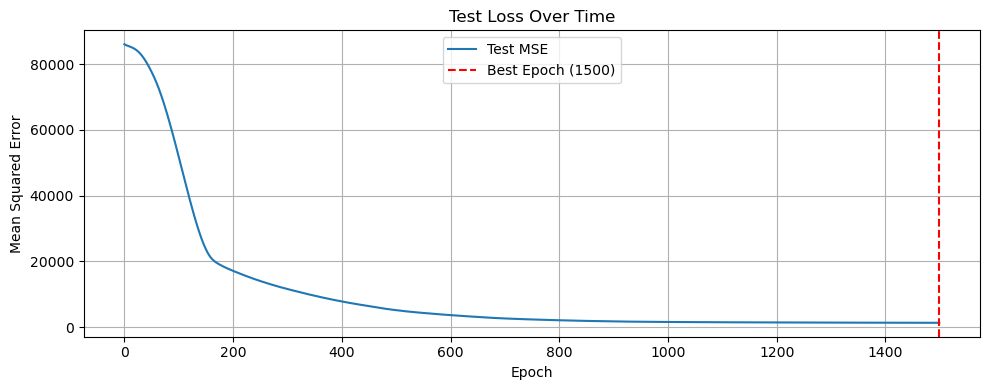

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from tqdm import tqdm
import warnings
import copy

# Suppress convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
model = MLPRegressor(
    hidden_layer_sizes=(16,),
    activation="relu",
    max_iter=1,
    warm_start=True,
    random_state=42
)

# Tracking
n_epochs = 1500
patience = 50  # Stop if no improvement for 100 epochs
no_improve = 0

test_losses = []
best_loss = float("inf")
best_model = None
best_epoch = -1

# Training loop
for epoch in tqdm(range(n_epochs), desc="Training MLP with Early Stopping"):
    model.fit(X_train_scaled, y_train)

    # Predict & compute test loss (MSE)
    y_pred = model.predict(X_test_scaled)
    test_loss = np.mean((y_pred - y_test) ** 2)
    test_losses.append(test_loss)

    # Save best model
    if test_loss < best_loss:
        best_loss = test_loss
        best_model = copy.deepcopy(model)
        best_epoch = epoch + 1
        no_improve = 0
    else:
        no_improve += 1

    # Early stopping condition
    if no_improve >= patience:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break

# Restore best model
model = best_model

# Final Evaluation
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nBest Test MSE: {best_loss:.4f} (at epoch {best_epoch})")
print(f"Train R^2: {train_score:.3f}")
print(f"Test R^2:  {test_score:.3f}")

# Plot test loss over epochs
plt.figure(figsize=(10, 4))
plt.plot(test_losses, label="Test MSE")
plt.axvline(best_epoch - 1, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Test Loss Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
import numpy as np

np.set_printoptions(precision=2, suppress=True)

y_preds = model.predict(X_test_scaled)

# Print first 5 samples
print("Sample Predictions (first 5):")
for i in range(5):
    print(f"Sample {i + 1}:")
    print(f"  Predicted: {y_preds[i]}")
    print(f"  Actual:    {y_test[i]}")
    print()


Sample Predictions (first 5):
Sample 1:
  Predicted: [575.52   0.83  19.39  20.69   5.27  15.49  20.78   5.26   2.04]
  Actual:    [539.07   0.18   9.74  27.62   5.72  15.87  19.06   4.25   1.75]

Sample 2:
  Predicted: [550.24   0.71  17.36  24.96   5.47  16.81  21.69   5.05   2.06]
  Actual:    [588.16   3.08  14.05  21.47   6.13  17.55  23.85   8.94   1.88]

Sample 3:
  Predicted: [601.43   1.05  14.68  27.23   5.81  16.64  23.8    5.59   2.16]
  Actual:    [588.16   3.08  14.05  21.47   6.13  17.55  23.85   8.94   1.88]

Sample 4:
  Predicted: [606.61   0.97   9.1   33.55   5.98  21.7   30.85   6.67   2.44]
  Actual:    [649.91   1.51  12.3   30.63   7.53  23.3   29.08   5.92   2.33]

Sample 5:
  Predicted: [652.39   0.9    3.68  24.77   5.41  22.95  29.22   6.44   2.48]
  Actual:    [649.91   1.51  12.3   30.63   7.53  23.3   29.08   5.92   2.33]



In [36]:
import json

# Extract the weights (coefs and intercepts) and convert them to regular lists
model_weights = {
    "coefs": [coef.tolist() for coef in model.coefs_],
    "intercepts": [inter.tolist() for inter in model.intercepts_]
}

# Write the weights to a JSON file
with open("aqi_model_weights.json", "w") as f:
    json.dump(model_weights, f)

print("Model weights saved to aqi_model_weights.json")


Model weights saved to aqi_model_weights.json


In [37]:
import json
import numpy as np

# Load the weights from the JSON file
with open("aqi_model_weights.json", "r") as f:
    model_weights = json.load(f)

# Convert lists back to NumPy arrays
coefs = [np.array(coef) for coef in model_weights["coefs"]]
intercepts = [np.array(inter) for inter in model_weights["intercepts"]]

print("Loaded model weights successfully!")

# Example: Print the first layer's weights and biases
print("\nFirst layer weights shape:", coefs[0].shape)
print("First layer intercepts shape:", intercepts[0].shape)


Loaded model weights successfully!

First layer weights shape: (63, 16)
First layer intercepts shape: (16,)


In [38]:
coefs[0]

array([[ 0.97,  1.99,  0.18, ..., -1.12,  0.16, -0.3 ],
       [-1.2 , -1.35,  3.82, ...,  0.51,  0.16, -0.47],
       [-0.58, -0.65,  1.36, ...,  0.45, -0.69,  0.38],
       ...,
       [-1.96, -2.18, -1.01, ...,  0.98, -0.25, -1.9 ],
       [-0.33,  0.81, -0.55, ...,  0.99,  0.98,  0.25],
       [ 2.25,  1.48, -0.11, ...,  1.19,  3.15,  2.65]])